# Planetary Data Analysis Notebook

For the first part of this script, I will solely focus on the kNN supervised learning technique applied to the data pertaining to exoplanets from NASA.

In [1]:
import time
start_time_0 = time.time()

In [2]:
# Import necessary libraries
from random import seed
from random import randrange
from numpy.random import rand
from numpy.random import randint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from scipy import stats
from math import sqrt
from scipy.stats import wilcoxon
from scipy.stats import spearmanr
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
# Assign path of data to a variable.
# Initiate first data frame with raw data.
seed(11)
path = 'https://raw.githubusercontent.com/jbravo87/blog-projects/main/data/PS_2022.05.10_21.48.38.csv'
raw_data = pd.read_csv(path, skiprows = 12)

Need to remove the first twelve rows. These rows contain copious notes/remarks. Want to see the head and tail of the data as well as the column names.

In [4]:
raw_data

,pl_name,hostname,pl_orbper,pl_bmassj,pl_orbeccen,pl_eqt
0,11 Com b,11 Com,326.03000,19.40,0.231,NaN
1,11 Com b,11 Com,NaN,17.10,NaN,NaN
2,11 UMi b,11 UMi,NaN,10.80,NaN,NaN
3,11 UMi b,11 UMi,516.21997,14.74,0.080,NaN
4,11 UMi b,11 UMi,516.22000,10.50,0.080,NaN
...,...,...,...,...,...,...
32511,ups And d,ups And,1282.41000,4.10,0.294,NaN
32512,ups And d,ups And,1281.50700,10.25,0.316,NaN
32513,ups Leo b,ups Leo,385.20000,0.51,0.320,NaN
32514,xi Aql b,xi Aql,NaN,2.02,NaN,NaN


In [5]:
raw_data.columns

Index(['pl_name', 'hostname', 'pl_orbper', 'pl_bmassj', 'pl_orbeccen',
       'pl_eqt'],
      dtype='object')

Now want to create first data frame with columns of interest. In this first case/scenario want to study planet eccentricity (dependent/response variable) as a function of orbital period of planet (independent/predictor variable).

## Case 1 - Eccentricity as function of Orbital Period

In [6]:
df1 = raw_data.loc[:, ['pl_name','pl_orbper','pl_orbeccen']]
#df1.reset_index(drop=True, inplace=True) # <- Perhaps use this logic in a couple of lines.
df1

,pl_name,pl_orbper,pl_orbeccen
0,11 Com b,326.03000,0.231
1,11 Com b,NaN,NaN
2,11 UMi b,NaN,NaN
3,11 UMi b,516.21997,0.080
4,11 UMi b,516.22000,0.080
...,...,...,...
32511,ups And d,1282.41000,0.294
32512,ups And d,1281.50700,0.316
32513,ups Leo b,385.20000,0.320
32514,xi Aql b,NaN,NaN


Will rename the columns of interest for ease, i.e. make analysis clearer, and remove unnecessary rows by removing all the NA values from the original data frame.

In [7]:
df1 = df1.rename(columns={'pl_name':'planetname', 'pl_orbper':'orbitperiod', 'pl_orbeccen':'eccentricity'})
df1 = df1.dropna()
#df1 = df1.fillna(df1.median(numeric_only=True))
df1

,planetname,orbitperiod,eccentricity
0,11 Com b,326.03000,0.2310
3,11 UMi b,516.21997,0.0800
4,11 UMi b,516.22000,0.0800
6,14 And b,185.84000,0.0000
7,14 Her b,1766.41000,0.3674
...,...,...,...
32510,ups And d,1274.60000,0.2420
32511,ups And d,1282.41000,0.2940
32512,ups And d,1281.50700,0.3160
32513,ups Leo b,385.20000,0.3200


The following logic is to determine the data types of the column entries in the latest data frame. Again, this is the data type (dtype) for individual entries within the data frame.

In [8]:
print(type(df1.iloc[0][1]))
print(type(df1.iloc[0][2]))

<class 'numpy.float64'>
<class 'numpy.float64'>


In [9]:
type(df1)

pandas.core.frame.DataFrame

In [10]:
print("The data type of the eccentricity column is:", df1.dtypes['eccentricity'])

The data type of the eccentricity column is: float64


Notice df1 is indeed a data frame, and the entries within are numpy float number type.

Want to limit each scenario to two dataframes. Once cleaned, need another to take arithmetic mean of multiple entries. For example, Dataframe 2 will take the averages of multiple planet entries. Following lines will take arithmetic mean of the two columns of interest and concate the two columns into the third dataframe.

First will create intermediate variables to store the resulting averages.

In [11]:
eccen = df1.groupby('planetname')['eccentricity'].mean()
orbper = df1.groupby('planetname')['orbitperiod'].mean()

In [12]:
print(eccen)
print(orbper)

planetname
11 Com b      0.231000
11 UMi b      0.080000
14 And b      0.000000
14 Her b      0.362233
16 Cyg B b    0.676033
                ...   
ups And b     0.030200
ups And c     0.238933
ups And d     0.281117
ups Leo b     0.320000
xi Aql b      0.000000
Name: eccentricity, Length: 4371, dtype: float64
planetname
11 Com b       326.030000
11 UMi b       516.219985
14 And b       185.840000
14 Her b      1766.601670
16 Cyg B b     799.375000
                 ...     
ups And b        4.616229
ups And c      240.728533
ups And d     1285.346167
ups Leo b      385.200000
xi Aql b       136.750000
Name: orbitperiod, Length: 4371, dtype: float64


In [13]:
type(eccen)

pandas.core.series.Series

In [14]:
type(orbper)

pandas.core.series.Series

In this part want to explicitly declare the median and IQR of the two columns which are the variables. But the summary statistics part of the analysis can be done with variables declared earlier.

In [15]:
eccen_med = statistics.median(list(eccen))
orbper_med = statistics.median(list(orbper))
print('\nThe median of the orbital period: %.4f' % orbper_med)
print('\nThe median of the eccentricity: %.2f' % eccen_med)
iqr_eccen = stats.iqr(eccen, interpolation = 'midpoint')
iqr_orbper = stats.iqr(orbper, interpolation = 'midpoint')
print('\nThe interquartile range of the eccentricity: %.2f' % iqr_eccen)
print('\nThe interquartile range of the orbital period: %.2f' % iqr_orbper)
eccen_avg = statistics.mean(list(eccen))
print('\nThe mean for the eccentricity: %.2f' % eccen_avg)
orbper_avg = statistics.mean(list(orbper))
print('\nThe mean for the orbital period: %.2f' % orbper_avg)


The median of the orbital period: 12.2538

The median of the eccentricity: 0.00

The interquartile range of the eccentricity: 0.07

The interquartile range of the orbital period: 39.93

The mean for the eccentricity: 0.06

The mean for the orbital period: 709.51


Five number summary including the central tendencies above.

In [16]:
def fivenum(data):
    """Five-number summary."""
    return np.percentile(data, [0, 25, 50, 75, 100], method = 'midpoint')
    # Line below was for an older version of Jupyter
    #return np.percentile(data, [0, 25, 50, 75, 100], interpolation='midpoint')

In [17]:
# Min, 1st quantile, median, 3rd quantile, max
fivenum(eccen)

array([0.        , 0.        , 0.        , 0.0659375 , 0.93188167])

In [18]:
# Min, 1st quantile, median, 3rd quantile, max
fivenum(orbper)

array([9.07062900e-02, 4.60227484e+00, 1.22538359e+01, 4.45284631e+01,
       1.79000000e+06])

In [19]:
df1 = pd.concat([orbper, eccen], axis = 1)
df1

,orbitperiod,eccentricity
planetname,,
11 Com b,326.030000,0.231000
11 UMi b,516.219985,0.080000
14 And b,185.840000,0.000000
14 Her b,1766.601670,0.362233
16 Cyg B b,799.375000,0.676033
...,...,...
ups And b,4.616229,0.030200
ups And c,240.728533,0.238933
ups And d,1285.346167,0.281117


Want the number of observations for reporting.

In [20]:
print("the number of observations:", len(df1.index))

the number of observations: 4371


In [21]:
print("The length of predictor (orbital period) is: ", len(df1.index))
print("The length of response (eccentricity) is: ", len(df1.index))

The length of predictor (orbital period) is:  4371
The length of response (eccentricity) is:  4371


All the filtering and cleaning was handled by end of df1.

In [22]:
df1.columns

Index(['orbitperiod', 'eccentricity'], dtype='object')

The orbital period is skewed right, but after applying a log transform, the distribution more closely resembles a Gaussian distribution.

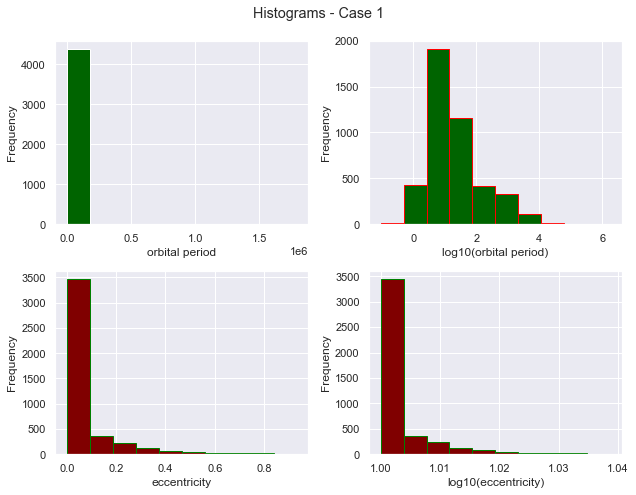

In [23]:
# First, perform log base 10 transform
orbper_log = np.log10(orbper)
eccen_log = np.log10(eccen + 10)
# Plotting Logic
fig1, ax1 = plt.subplots(2, 2,figsize = (9, 7))
fig1.suptitle('Histograms - Case 1')
ax1[0, 0].hist(orbper, color = 'darkgreen', edgecolor = 'white')
#ax1[0, 0].set_title('') #<- use this logic to give each plot its own title.
ax1[0, 0].set(xlabel = 'orbital period')
ax1[0, 1].hist(orbper_log, color = "darkgreen", edgecolor = 'red')
ax1[0, 1].set(xlabel = 'log10(orbital period)')
ax1[1, 0].hist(eccen, color = "maroon", edgecolor = 'green')
ax1[1, 0].set(xlabel = 'eccentricity')
ax1[1, 1].hist(eccen_log, color = "maroon", edgecolor = 'green')
ax1[1, 1].set(xlabel = 'log10(eccentricity)')

for ax in ax1.flat:
    ax.set(ylabel = 'Frequency')
plt.savefig('histograms_1.png',dpi=600)
fig1.tight_layout()

The distribution is still skewed right after applying the transform.

#### Model Building

As a resampling method, will use the train-test-split (tts) method.

In [24]:
X1 = np.array(orbper).reshape(-1,1)
y1 = np.array(eccen).reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.80, random_state = 25)
y1_train = y1_train.reshape(len(y1_train), )
y1_test = y1_test.reshape(len(y1_test), )

Will change the central tendency metric from median to mean to get a better R-squared metric.

In [25]:
# For central tendency can use either median or mean.
y_baseline = y1_train.mean()
#y_baseline = statistics.median(y1_train)
y_baseline

0.0637315305801972

In [26]:
y_pred_train = [y_baseline] * len(y1_train)

In [27]:
# Following is for the Training Dataset.
# Error for training data baseline guess.
mae_train_1 = mean_absolute_error(y1_train, y_pred_train)
print(f'Traing Set Mean Absolute Error: {mae_train_1}')
# Mean squared error for training data baseline guess.
mse_train_1 = mean_squared_error(y1_train, y_pred_train)
print(f'Traing Set Mean Squared Error: {mse_train_1}')
rmse_train_1 = sqrt(mse_train_1) # <- will compute the root mean square error
print(f'Traing Set Root Mean Square Error: {rmse_train_1}')
# R-squared for training data baseline guess.
r2_train_1 = r2_score(y1_train, y_pred_train)
print(f'Traing Set R2: {r2_train_1}')

Traing Set Mean Absolute Error: 0.08752901986553943
Traing Set Mean Squared Error: 0.01788375152612843
Traing Set Root Mean Square Error: 0.13373014441825906
Traing Set R2: 0.0


In [28]:
y_pred_test = [y_baseline] * len(y1_test)

In [29]:
# Error for test data baseline guess.
mae_test_1 = mean_absolute_error(y1_test, y_pred_test)
print(f'Test Set Mean Absolute Error: {mae_test_1}')
# Mean squared error for test data baseline guess.
mse_test_1 = mean_squared_error(y1_test, y_pred_test)
print(f'Test Set Mean Squared Error: {mse_test_1}')
rmse_test_1 = sqrt(mse_test_1) # <- will compute the root mean square error
print(f'Test Set Root Mean Square Error: {rmse_test_1}')
# R-squared for test data baseline guess.
r2_test_1 = r2_score(y1_test, y_pred_test)
print(f'Test Set R2: {r2_test_1}')

Test Set Mean Absolute Error: 0.09067568318514926
Test Set Mean Squared Error: 0.019771780663498325
Test Set Root Mean Square Error: 0.14061216399550333
Test Set R2: -9.981601752739877e-05


In [30]:
prediction_1 = pd.DataFrame(['Baseline', mae_train_1, mse_train_1, rmse_train_1, r2_train_1, mae_test_1, mse_test_1, rmse_test_1, r2_test_1]).T
metric_col_names = ['Method', 'Train MAE', 'Train MSE', 'Train RMSE', 'Train R2', 'Test MAE', 'Test MSE','Test RMSE', 'Test R2'] # <- This list will be used over so easier to store in variable.
prediction_1.columns = metric_col_names
prediction_1

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Baseline,0.087529,0.017884,0.13373,0.0,0.090676,0.019772,0.140612,-0.0001


Now to apply the logarithmic and exponential transformations to the variables I chose.

In [31]:
X1_train_log = np.log10(X1_train)
X1_test_log = np.log10(X1_test)
#y1_train_log = np.log(y1_train + 10) # <- Remember to add 10 units to be able apply log transform
y1_train_exp = np.exp(y1_train)
y1_test_exp = np.exp(y1_test)

With the data scaled using aforementioned trasnformations, will now test various k's for best fit. Will run kNN for various values of n_neighbors and store results. This will help me determine optimal 'k'.

In [32]:
# kNN R-squared accuracy for 1st kNN model
knn_r_acc_1 = []
for i1 in range(1, 75, 1):
    knn = KNeighborsRegressor(n_neighbors = i1)
    knn.fit(X1_train_log.reshape(-1, 1), y1_train.reshape(-1, 1))
    test_score_1 = knn.score(X1_test_log.reshape(-1, 1), y1_test.reshape(-1, 1))
    train_score_1 = knn.score(X1_train_log.reshape(-1, 1), y1_train.reshape(-1, 1))
    knn_r_acc_1.append((i1, test_score_1, train_score_1))
outcomes_1 = pd.DataFrame(knn_r_acc_1, columns = ['k', 'Test Score', 'Train Score'])
print(outcomes_1)
print('The highest Test R-squared value occurs at : %.4f' % outcomes_1.iloc[:,1].max())
print('Within given range, optimal k is: ', outcomes_1.loc[outcomes_1['Test Score'] == outcomes_1.iloc[:,1].max(), 'k'].iloc[0])

     k  Test Score  Train Score
0    1   -0.376242     0.999928
1    2   -0.008741     0.670980
2    3    0.094896     0.545762
3    4    0.148759     0.490142
4    5    0.189452     0.456295
..  ..         ...          ...
69  70    0.352576     0.321298
70  71    0.351332     0.320772
71  72    0.350412     0.320366
72  73    0.350777     0.319908
73  74    0.350296     0.320097

[74 rows x 3 columns]
The highest Test R-squared value occurs at : 0.3530
Within given range, optimal k is:  64


Bootstrap confidence interval to get estimate on RMSE for various models.

In [33]:
def ci_bootstrap(df, model):
    # set up data
    values = df.values
    # configure bootstrap
    n_iters = 1000
    n_size = 500
    metrics = []
    # for loop
    for index in range(n_iters):
        # prep training and testing sets
        train = resample(values, n_samples = n_size)
        test = np.array([i for i in values if i.tolist() not in train.tolist()])
        # Fit model
        model.fit(train[:,:-1], train[:,-1])
        # Evaluate model
        predictions = model.predict(test[:,:-1])
        score = np.sqrt(mean_squared_error(test[:,-1], predictions))
        #print(score)
        metrics.append(score)
    metrics = pd.Series(metrics)
    return metrics

Execution time in minutes: 22.96833999156952


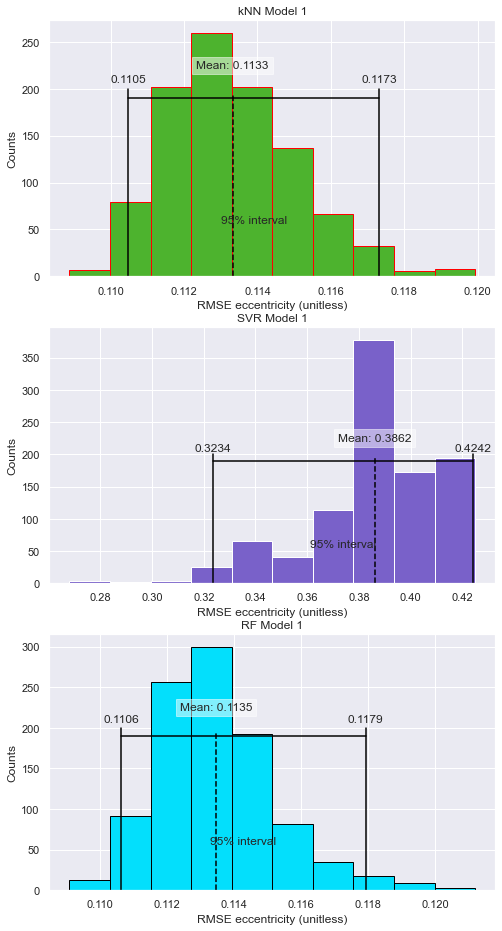

In [34]:
# Save this spot for the bootstrap confidence interval
start_time_1 = time.time()

df2 = pd.concat([np.log10(orbper), eccen], axis=1)
metrics1_1 = ci_bootstrap(df2, KNeighborsRegressor(n_neighbors = 64))

# Plotting Logic
fig1_2, ax1_2 = plt.subplots(3, 1, figsize = (8, 16))
#fig1_2.suptitle('Bootstrap Performance Metrics - Case 1')

# Confidence Interval
confidence_interval1_1 = list(metrics1_1.quantile([0.025, 0.975]))

ax1_2[0].hist(metrics1_1, color='#4db32e', edgecolor = "red")
ax1_2[0].plot(confidence_interval1_1, [190, 190], color='black')
for x1 in confidence_interval1_1:
    ax1_2[0].plot([x1, x1], [0, 200], color='black')
    ax1_2[0].text(x1, 210, f'{x1:.4f}', 
            horizontalalignment='center', verticalalignment='center')
ax1_2[0].text(sum(confidence_interval1_1) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

mean_knn_model_1 = metrics1_1.mean()
ax1_2[0].plot([mean_knn_model_1, mean_knn_model_1], [0, 195], color='black', linestyle='--')
ax1_2[0].text(mean_knn_model_1, 225, f'Mean: {mean_knn_model_1:.4f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax1_2[0].set_title('kNN Model 1')

# Now for the SVR model
eps_1 = 8 #<- hyperparameters used throughout the script
hyperparam1 = 1000 #<- hyperparameters used throughout the script
metrics1_2 = ci_bootstrap(df2, SVR(kernel = 'rbf', C = hyperparam1, epsilon = eps_1))
confidence_interval1_2 = list(metrics1_2.quantile([0.025, 0.975]))

ax1_2[1].hist(metrics1_2, color='#7961c9', edgecolor = "white")
ax1_2[1].plot(confidence_interval1_2, [190, 190], color='black')
for x1 in confidence_interval1_2:
    ax1_2[1].plot([x1, x1], [0, 200], color='black')
    ax1_2[1].text(x1, 210, f'{x1:.4f}', 
            horizontalalignment='center', verticalalignment='center')
ax1_2[1].text(sum(confidence_interval1_2) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

mean_svr_model_1 = metrics1_2.mean()
ax1_2[1].plot([mean_svr_model_1, mean_svr_model_1], [0, 195], color='black', linestyle='--')
ax1_2[1].text(mean_svr_model_1, 225, f'Mean: {mean_svr_model_1:.4f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax1_2[1].set_title('SVR Model 1')

# Now for the Random Forest model
metrics1_3 = ci_bootstrap(df2, RandomForestRegressor(max_depth=2))
confidence_interval1_3 = list(metrics1_3.quantile([0.025, 0.975]))

ax1_2[2].hist(metrics1_3, color='#03dffc', edgecolor = "black")
ax1_2[2].plot(confidence_interval1_3, [190, 190], color='black')
for x1 in confidence_interval1_3:
    ax1_2[2].plot([x1, x1], [0, 200], color='black')
    ax1_2[2].text(x1, 210, f'{x1:.4f}', 
            horizontalalignment='center', verticalalignment='center')
ax1_2[2].text(sum(confidence_interval1_3) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

mean_rf_model_1 = metrics1_3.mean()
ax1_2[2].plot([mean_rf_model_1, mean_rf_model_1], [0, 195], color='black', linestyle='--')
ax1_2[2].text(mean_rf_model_1, 225, f'Mean: {mean_rf_model_1:.4f}',
      bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
       horizontalalignment='center', verticalalignment='center')
ax1_2[2].set_title('RF Model 1')

for ax in ax1_2.flat:
    ax.set(ylabel = 'Counts')
    ax.set(xlabel = 'RMSE eccentricity (unitless)')
    
plt.savefig('bootstrap_rmse_1.png',dpi=800)

execution_time_1 = (time.time() - start_time_1)
print('Execution time in minutes: ' + str(execution_time_1/60))

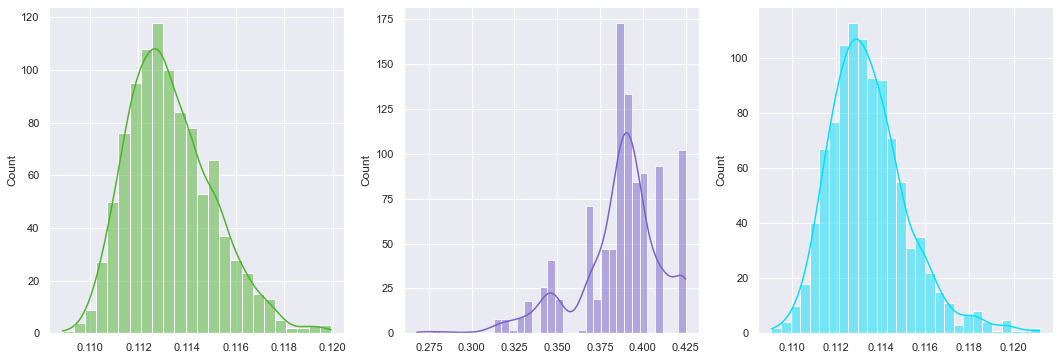

In [35]:
fig_knn1, axs_knn1 = plt.subplots(1, 3, figsize = (18, 6))

sns.histplot(metrics1_1, kde=True, color="#4db32e", ax=axs_knn1[0])
sns.histplot(metrics1_2, kde=True, color="#7961c9", ax=axs_knn1[1])
sns.histplot(metrics1_3, kde=True, color="#03dffc", ax=axs_knn1[2])

plt.savefig('sns_example1.png')
plt.show()

In [36]:
metrics1_1.mean()
len(metrics1_1)

1000

In [37]:
knn_model_1 = KNeighborsRegressor(n_neighbors = 64)
knn_model_1.fit(X1_train_log, y1_train)
y_knn_train_pred_log_1 = knn_model_1.predict(X1_train_log)
y_knn_test_pred_log_1 = knn_model_1.predict(X1_test_log)

In [38]:
# Following line to remind myself that values between 0 - 1 will produce negative value in log.
np.log(0.055550)

-2.890471762896498

Now, the decision on whether or not to scale back to original scale.

In [39]:
#y_knn_train_pred_1 = np.exp(y_knn_train_pred_log_1)
#y_knn_train_pred_1 = np.power(y_knn_train_pred_log_1, 10)
y_knn_train_pred_1 = y_knn_train_pred_log_1
#y_knn_test_pred_1 = np.log(y_knn_test_pred_log_1) 
#y_knn_test_pred_1 = np.power(y_knn_test_pred_log_1, 10)
y_knn_test_pred_1 = y_knn_test_pred_log_1
#y_knn_test_pred_1 = np.exp(y_knn_test_pred_log_1) 

Trying to avoid data leakage when going from transform to inverse.

In [40]:
# First the training metrics.
knn1_train_mae = mean_absolute_error(y1_train, y_knn_train_pred_1)
knn1_train_mse = mean_squared_error(y1_train, y_knn_train_pred_1)
knn1_train_rmse = sqrt(knn1_train_mse) # <- will compute the root mean square error
knn1_train_r2 = r2_score(y1_train, y_knn_train_pred_1)
# Now, test set metrics.
knn1_test_mae = mean_absolute_error(y1_test, y_knn_test_pred_1)
knn1_test_mse = mean_squared_error(y1_test, y_knn_test_pred_1)
knn1_test_rmse = sqrt(knn1_test_mse)
knn1_test_r2 = r2_score(y1_test, y_knn_test_pred_1)
# Consolidate the results.
knn_results_1 = pd.DataFrame(['k Nearest Neighbor', knn1_train_mae, knn1_train_mse, knn1_train_rmse, knn1_train_r2, knn1_test_mae, knn1_test_mse, knn1_test_rmse, knn1_test_r2]).transpose()
knn_results_1.columns = metric_col_names
knn_results_1

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,k Nearest Neighbor,0.066004,0.01209,0.109954,0.32398,0.067364,0.012791,0.113099,0.352987


#### SVR regressor model.

In [41]:
eps_1 = 8
hyperparam1 = 1000
svr_model_1 = SVR(kernel = 'rbf', C = hyperparam1, epsilon = eps_1)
svr_model_1.fit(X1_train_log, y1_train)
y_svr_train_pred_1 = svr_model_1.predict(X1_train_log)
y_svr_test_pred_1 = svr_model_1.predict(X1_test_log)
# Model performance - training set
svr1_train_mae = mean_absolute_error(y1_train, y_svr_train_pred_1)
svr1_train_mse = mean_squared_error(y1_train, y_svr_train_pred_1)
svr1_train_rmse = sqrt(svr1_train_mse)
svr1_train_r2 = r2_score(y1_train, y_svr_train_pred_1)
# Test results
svr1_test_mae = mean_absolute_error(y1_test, y_svr_test_pred_1)
svr1_test_mse = mean_squared_error(y1_test, y_svr_test_pred_1)
svr1_test_rmse = sqrt(svr1_test_mse)
svr1_test_r2 = r2_score(X1_test, y_svr_test_pred_1)
# Consolidate the results.
svr_results_1 = pd.DataFrame(['SVR', svr1_train_mae, svr1_train_mse, svr1_train_rmse, svr1_train_r2, svr1_test_mae, svr1_test_mse, svr1_test_rmse, svr1_test_r2]).T
svr_results_1.columns = metric_col_names
svr_results_1

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,SVR,0.411196,0.179656,0.423859,-9.045771,0.412441,0.180414,0.424752,-0.025483


Now want to model using the Random Forest Regressor.

In [42]:
rf_1 = RandomForestRegressor(max_depth=2)
#rf_1.fit(X1_train_log.reshape(-1, 1), y1_train.reshape(-1, 1))
rf_1.fit(X1_train_log, y1_train)
#y_rf_train_pred_1 = rf_1.predict(X1_train_log.reshape(-1, 1))
y_rf_train_pred_1 = rf_1.predict(X1_train_log)
#y_rf_test_pred_1 = rf_1.predict(X1_test_log.reshape(-1, 1))
y_rf_test_pred_1 = rf_1.predict(X1_test_log)
rf_1

RandomForestRegressor(max_depth=2)

In [43]:
# Model performance metrics for random forest model.
rf1_train_mae = mean_absolute_error(y1_train, y_rf_train_pred_1)
rf1_train_mse = mean_squared_error(y1_train, y_rf_train_pred_1)
rf1_train_rmse = sqrt(rf1_train_mse)
rf1_train_r2 = r2_score(y1_train, y_rf_train_pred_1)
# The following are the test metrics.
rf1_test_mae = mean_absolute_error(y1_test, y_rf_test_pred_1)
rf1_test_mse = mean_squared_error(y1_test, y_rf_test_pred_1)
rf1_test_rmse = sqrt(rf1_test_mse)
rf1_test_r2 = r2_score(y1_test, y_rf_test_pred_1)

In [44]:
rf1_results = pd.DataFrame(['Random Forest', rf1_train_mae, rf1_train_mse, rf1_train_rmse, rf1_train_r2, rf1_test_mae, rf1_test_mse, rf1_test_rmse, rf1_test_r2]).transpose()
rf1_results.columns = metric_col_names
rf1_results

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Random Forest,0.066466,0.012156,0.110254,0.320281,0.066863,0.012501,0.111808,0.367674


Want to add all the results to a single table.

In [45]:
results_1 = pd.concat([prediction_1, knn_results_1, svr_results_1, rf1_results], axis = 0, ignore_index = True)
results_1 

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Baseline,0.087529,0.017884,0.13373,0.0,0.090676,0.019772,0.140612,-0.0001
1,k Nearest Neighbor,0.066004,0.01209,0.109954,0.32398,0.067364,0.012791,0.113099,0.352987
2,SVR,0.411196,0.179656,0.423859,-9.045771,0.412441,0.180414,0.424752,-0.025483
3,Random Forest,0.066466,0.012156,0.110254,0.320281,0.066863,0.012501,0.111808,0.367674


### Bootstrap Confidence Intervals

For this section, want to develop logic to use bootstrap method to configure confidence interval.

In [46]:
df2_log = pd.concat([np.log10(orbper), eccen], axis = 1)
df2_log

,orbitperiod,eccentricity
planetname,,
11 Com b,2.513258,0.231000
11 UMi b,2.712835,0.080000
14 And b,2.269139,0.000000
14 Her b,3.247139,0.362233
16 Cyg B b,2.902751,0.676033
...,...,...
ups And b,0.664287,0.030200
ups And c,2.381528,0.238933
ups And d,3.109020,0.281117


In [47]:
df2_log.values

array([[2.51325756, 0.231     ],
       [2.71283481, 0.08      ],
       [2.2691392 , 0.        ],
       ...,
       [3.10902011, 0.28111667],
       [2.58568628, 0.32      ],
       [2.13592734, 0.        ]])

In [48]:
type(df2_log)

pandas.core.frame.DataFrame

In [49]:
#plt.hist(a1, color = '#4db32e', edgecolor = 'red') #<- Good color scheme
#plt.hist(a2, color = '#ad6dcf', edgecolor = 'white')

### Plotting Case 1

Want to make a quick calculation of the residuals in this prediction and actual values evaluation.

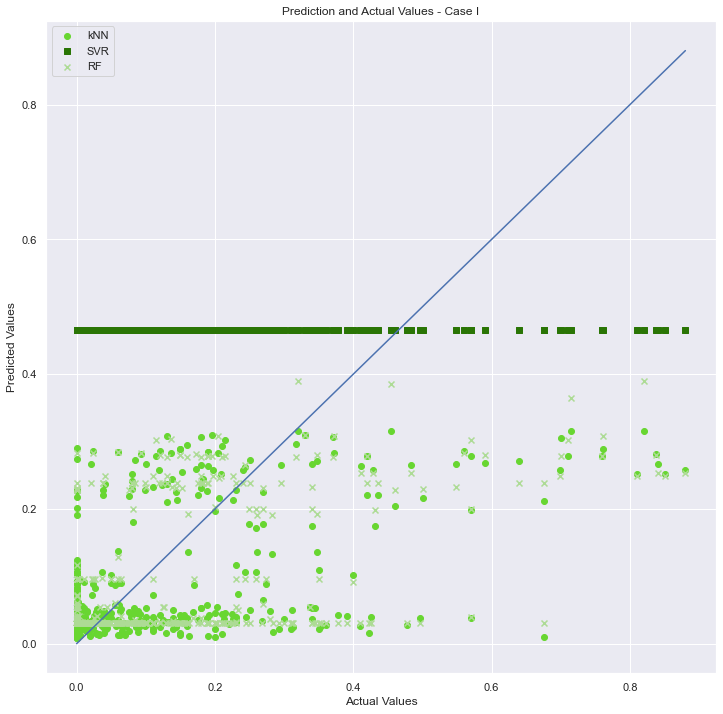

In [50]:
true_values_1 = y1_test
predicted_values1_1 = y_knn_test_pred_1
predicted_values1_2 = y_svr_test_pred_1
predicted_values1_3 = y_rf_test_pred_1
plt.figure(figsize = (12, 12))
# kNN model
knn_1 = plt.scatter(x = true_values_1, y = predicted_values1_1, c = '#68d631')
# SVR model
svr_1 = plt.scatter(x = true_values_1, y = predicted_values1_2, c = '#2a7505', marker = 's')
# Random Forest model
rf_1 = plt.scatter(x = true_values_1, y = predicted_values1_3, c = '#addb95', marker = 'x')
p1 = max(max(predicted_values1_1), max(predicted_values1_2), max(predicted_values1_3), max(true_values_1))
p2 = min(min(predicted_values1_1), min(predicted_values1_2), min(predicted_values1_3), min(true_values_1))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Prediction and Actual Values - Case I')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend([knn_1, svr_1, rf_1], ['kNN', 'SVR', 'RF'], loc = 'upper left')
plt.savefig('pred_vs_actual_1.png',dpi=600)
plt.show()

Want to plot the residuals and see if there are any obvious patterns. Another name is the Versus Fit.

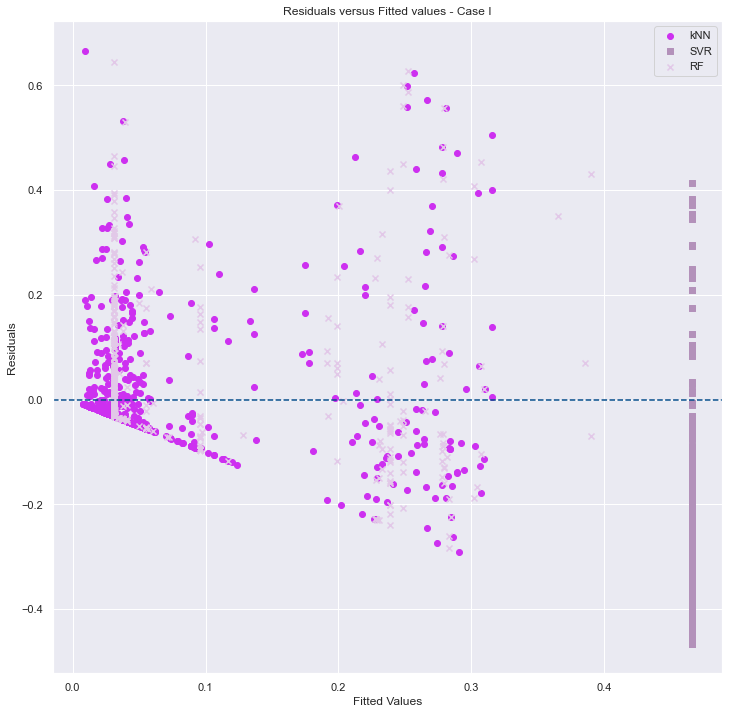

In [51]:
# Will invoke for loop to calculate residulas for the three different models.
residuals1_1 = list()
for item1, item2 in zip(true_values_1, predicted_values1_1):
    residuals1_1.append(item1 - item2)
residuals1_2 = list()
for item3, item4 in zip(true_values_1, predicted_values1_2):
    residuals1_2.append(item3 - item4)
residuals1_3 = list()
for item5, item6 in zip(true_values_1, predicted_values1_3):
    residuals1_3.append(item5 - item6)

plt.figure(figsize = (12, 12))
# kNN model
knn_resid_1 = plt.scatter(x = predicted_values1_1, y = residuals1_1, c = '#cd30f0')
# SVR model
svr_resid_1 = plt.scatter(x = predicted_values1_2, y = residuals1_2, c = '#b391ba', marker = 's')
# Random Forest model
rf_resid_1 = plt.scatter(x = predicted_values1_3, y = residuals1_3, c = '#e2c8e8', marker = 'x')

plt.title('Residuals versus Fitted values - Case I')
plt.xlabel('Fitted Values') # <- Predicted Values
plt.ylabel('Residuals')
plt.legend([knn_resid_1, svr_resid_1, rf_resid_1], ['kNN', 'SVR', 'RF'], loc = 'upper right')
plt.axhline(y = 0.0, color = '#034b8a', linestyle = '--')
plt.savefig('resid_1.png',dpi=600)
plt.show()

There is an obvious pattern in the residuals plot.

(array([686.,  67.,  52.,  27.,  16.,   6.,   6.,   5.,   4.,   6.]),
 array([-0.46594083, -0.37794083, -0.28994083, -0.20194083, -0.11394083,
        -0.02594083,  0.06205917,  0.15005917,  0.23805917,  0.32605917,
         0.41405917]),
 <BarContainer object of 10 artists>)

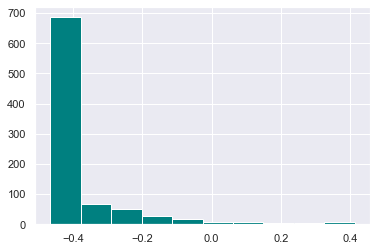

In [52]:
plt.hist(residuals1_2, color = "teal", edgecolor = 'white')

### Scenario 2 - temperature as function of planet mass

Now want to begin analysis of equilibrium temperature as a function of planet size.

In [53]:
df3 = raw_data.loc[:, ['pl_name','pl_bmassj','pl_eqt']]
df3

,pl_name,pl_bmassj,pl_eqt
0,11 Com b,19.40,NaN
1,11 Com b,17.10,NaN
2,11 UMi b,10.80,NaN
3,11 UMi b,14.74,NaN
4,11 UMi b,10.50,NaN
...,...,...,...
32511,ups And d,4.10,NaN
32512,ups And d,10.25,NaN
32513,ups Leo b,0.51,NaN
32514,xi Aql b,2.02,NaN


In [54]:
df3 = df3.rename(columns={'pl_name':'planetname', 'pl_bmassj':'mass', 'pl_eqt':'temperature'})
df3 = df3.dropna()
#df3 = df3.fillna(df3.median(numeric_only=True))
df3

,planetname,mass,temperature
23,1RXS J160929.1-210524 b,12.00000,1700.0
24,1RXS J160929.1-210524 b,8.00000,1700.0
25,1RXS J160929.1-210524 b,8.00000,1800.0
26,1RXS J160929.1-210524 b,8.00000,1800.0
30,2M0437 b,4.00000,1450.0
...,...,...,...
32454,kap And b,13.61600,1900.0
32473,pi Men c,0.01422,1147.0
32474,pi Men c,0.01517,1170.0
32480,rho CrB b,1.04490,614.0


In [55]:
mass = df3.groupby('planetname')['mass'].mean()
temp = df3.groupby('planetname')['temperature'].mean()

Want the length of both variables for reporting.

In [56]:
print("The length of predictor (mass) is: ", len(mass.index))

The length of predictor (mass) is:  860


In [57]:
print("The length of response (temperature) is: ", len(temp.index))

The length of response (temperature) is:  860


In [58]:
print(mass)
print(temp)

planetname
1RXS J160929.1-210524 b         9.000000
2M0437 b                        4.000000
2MASS J12073346-3932539 b       4.500000
2MASS J21402931+1625183 A b    20.950000
51 Eri b                        2.000000
                                 ...    
bet Pic b                      13.500000
kap And b                      13.208000
pi Men c                        0.014695
rho CrB b                       1.044900
rho CrB c                       0.078660
Name: mass, Length: 860, dtype: float64
planetname
1RXS J160929.1-210524 b        1750.0
2M0437 b                       1450.0
2MASS J12073346-3932539 b      1200.0
2MASS J21402931+1625183 A b    2075.0
51 Eri b                        700.0
                                ...  
bet Pic b                      1631.0
kap And b                      1790.0
pi Men c                       1158.5
rho CrB b                       614.0
rho CrB c                       448.0
Name: temperature, Length: 860, dtype: float64


Want some summary statistics for the new two variables.

In [59]:
mass_med = statistics.median(list(mass))
temp_med = statistics.median(list(temp))
print('\nThe median mass: %.4f' % mass_med)
print('\nThe median temperature: %.2f' % temp_med)
iqr_mass = stats.iqr(mass, interpolation = 'midpoint')
iqr_temp = stats.iqr(temp, interpolation = 'midpoint')
print('\nThe interquartile range of the mass: %.2f' % iqr_mass)
print('\nThe interquartile range of the temperature: %.2f' % iqr_temp)
mass_mode = statistics.mode(list(mass))
print('\nThe mode for the mass: %.2f' % mass_mode)
temp_mode = statistics.mode(list(temp))
print('\nThe mode for the temperature: %.2f' % temp_mode)
mass_avg = statistics.mean(list(mass))
print('\nThe mean for the mass: %.2f' % mass_avg)
temp_avg = statistics.mean(list(temp))
print('\nThe mean for the planetary temperature: %.2f' % temp_avg)


The median mass: 0.5755

The median temperature: 1185.00

The interquartile range of the mass: 1.34

The interquartile range of the temperature: 917.50

The mode for the mass: 0.84

The mode for the temperature: 1480.00

The mean for the mass: 1.67

The mean for the planetary temperature: 1192.26


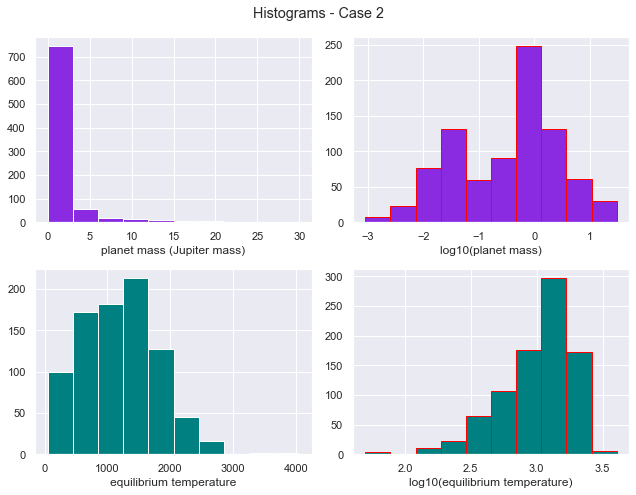

In [60]:
# First, perform log base 10 transform
mass_log = np.log10(mass)
temp_log = np.log10(temp)
# Plotting Logic
fig2, ax2 = plt.subplots(2, 2,figsize = (9, 7))
fig2.suptitle('Histograms - Case 2')
ax2[0, 0].hist(mass, color = 'blueviolet', edgecolor = 'white')
#ax2[0, 0].set_title('') #<- use this logic to give each plot its own title.
ax2[0, 0].set(xlabel = 'planet mass (Jupiter mass)')
ax2[0, 1].hist(mass_log, color = 'blueviolet', edgecolor = 'red')
ax2[0, 1].set(xlabel = 'log10(planet mass)')
ax2[1, 0].hist(temp, color = 'teal', edgecolor = 'white')
ax2[1, 0].set(xlabel = 'equilibrium temperature')
ax2[1, 1].hist(temp_log, color = 'teal', edgecolor = 'red')
ax2[1, 1].set(xlabel = 'log10(equilibrium temperature)')

for ax in ax1.flat:
    ax.set(ylabel = 'Frequency')
plt.savefig('histograms_2.png',dpi=600)
fig2.tight_layout()

The distribution became more normally distributed when applying the log base 10 transformation on the dataset.

In this case, the dataset became skew left when the logarithmic transformation was applied.

Will now split the data into their respective sets.

In [61]:
X2 = np.array(mass).reshape(-1,1)
y2 = np.array(temp).reshape(-1, 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.80, random_state = 25)
y2_train = y2_train.reshape(len(y2_train), )
y2_test = y2_test.reshape(len(y2_test), )

In [62]:
# Sample timing logic to track seconds to complete the script.
#execution_time_0 = (time.time() - start_time_0)
#print('Execution time in seconds: ' + str(execution_time_0))

In [63]:
# Establishing baselines for predictions according to the y-variable or response variable.
y_baseline_2= y2_train.mean()
#y_baseline_2= statistics.median(y2_train)
y_pred_train_2 = [y_baseline_2]*len(y2_train) #<- Training Baseline
y_pred_test_2 = [y_baseline_2]*len(y2_test)

In [64]:
# Following is for the Training Dataset.
# Error for training data baseline guess.
mae_train_2 = mean_absolute_error(y2_train, y_pred_train_2)
# Mean squared error for training data baseline guess.
mse_train_2 = mean_squared_error(y2_train, y_pred_train_2)
rmse_train_2 = sqrt(mse_train_2) # <- will compute the root mean square error
# R-squared for training data baseline guess.
y2_train_r2 = r2_score(y2_train, y_pred_train_2)

In [65]:
# Error for test data baseline guess.
mae_test_2 = mean_absolute_error(y2_test, y_pred_test_2)
# Mean squared error for test data baseline guess.
mse_test_2 = mean_squared_error(y2_test, y_pred_test_2)
# Test Root Mean Square Error
rmse_test_2 = sqrt(mse_test_2)
# R-squared for test data baseline guess.
y2_test_r2 = r2_score(y2_test, y_pred_test_2)

In [66]:
baseline_2 = pd.DataFrame(['Baseline', mae_train_2, mse_train_2, rmse_train_2, y2_train_r2, mae_test_2, mse_test_2, rmse_test_2, y2_test_r2]).T
baseline_2.columns = metric_col_names
baseline_2

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Baseline,499.285981,369158.844853,607.584434,0.0,452.721233,282866.309612,531.851774,-0.007957


Recall that the response variable (y) in this case is the mass of the planet (in Jupiter masses) which needs the log base 10 transform.

In [67]:
X2_train_log, X2_test_log = np.log10(X2_train), np.log10(X2_test)
y2_train_log = np.log10(y2_train)

In [68]:
# kNN R-squared accuracy
knn_r_acc_2 = []
for j in range(1, 75, 1):
    knn_2 = KNeighborsRegressor(n_neighbors = j)
    knn_2.fit(X2_train_log.reshape(-1, 1), y2_train_log.reshape(-1, 1))
    test_score_2 = knn_2.score(X2_test_log.reshape(-1, 1), np.log10(y2_test))
    train_score_2 = knn_2.score(X2_train_log.reshape(-1, 1), y2_train_log.reshape(-1, 1))
    knn_r_acc_2.append((j, test_score_2, train_score_2))
outcomes_2 = pd.DataFrame(knn_r_acc_2, columns = ['k', 'Test Score', 'Train Score'])
print(outcomes_2)
print('The highest Test R-squared value occurs at : %.4f' % outcomes_2.iloc[:,1].max())
print('Within given range, optimal k is: ', outcomes_2.loc[outcomes_2['Test Score'] == outcomes_2.iloc[:,1].max(), 'k'].iloc[0])

     k  Test Score  Train Score
0    1   -0.836310     0.882175
1    2   -0.041881     0.598381
2    3    0.055052     0.482562
3    4    0.117461     0.427514
4    5    0.120823     0.380144
..  ..         ...          ...
69  70    0.203371     0.243813
70  71    0.203670     0.242172
71  72    0.204122     0.242603
72  73    0.206701     0.241634
73  74    0.207193     0.241222

[74 rows x 3 columns]
The highest Test R-squared value occurs at : 0.2164
Within given range, optimal k is:  40


Execution time in minutes: 8.099270876248678


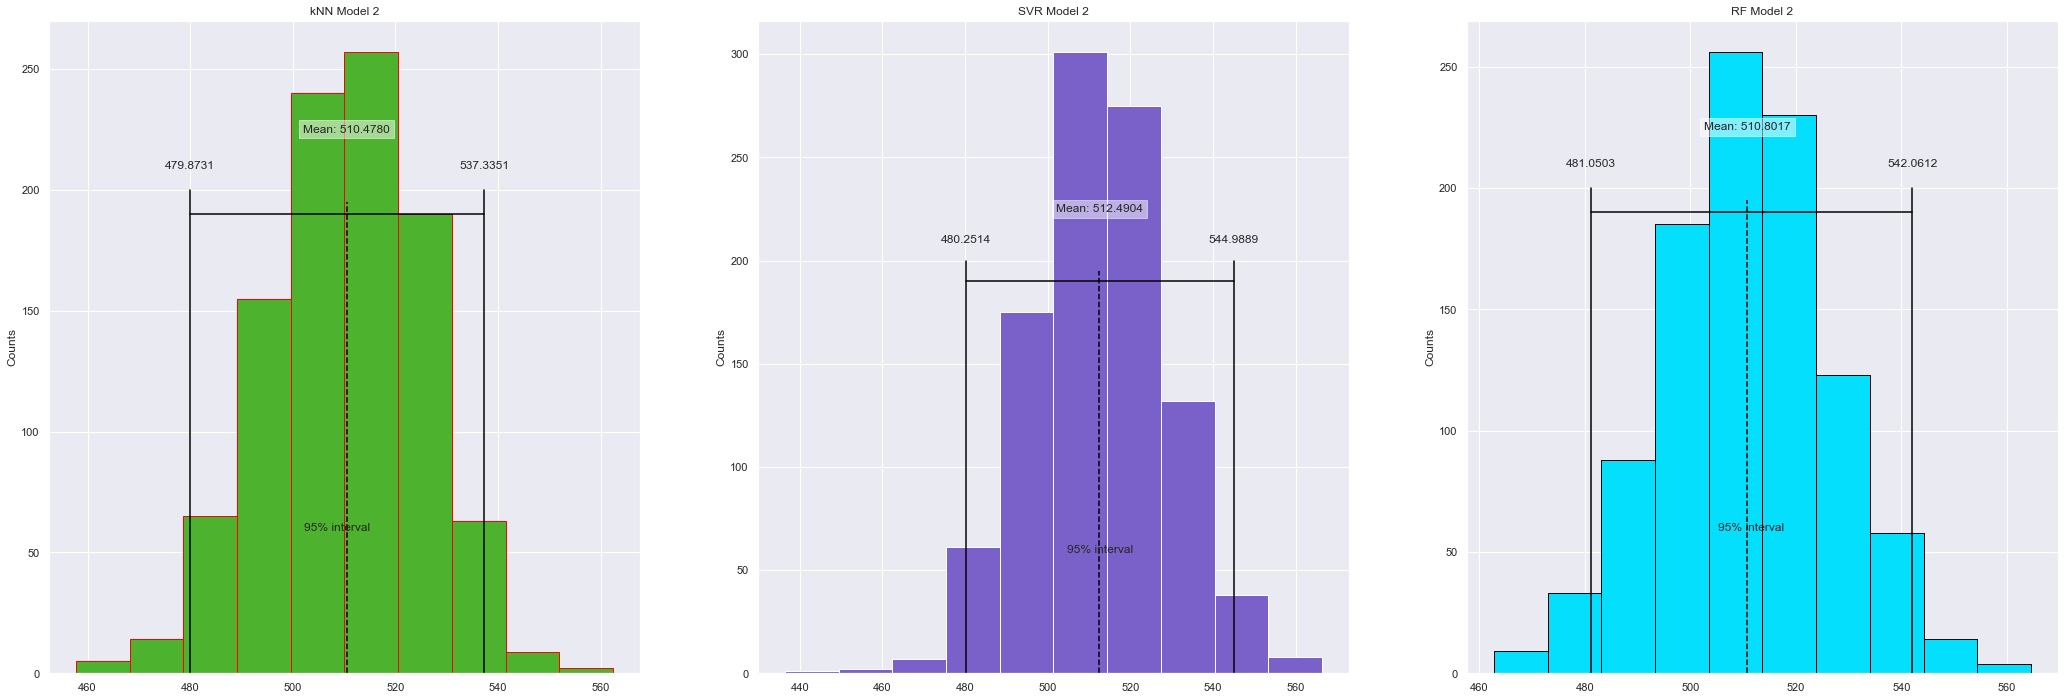

In [69]:
start_time_2 = time.time()

df3 = pd.concat([np.log10(mass), temp], axis=1)
metrics2_1 = ci_bootstrap(df3, KNeighborsRegressor(n_neighbors = 40))

# Plotting Logic
fig2_2, ax2_2 = plt.subplots(1, 3, figsize = (36, 12))
#fig1_2.suptitle('Bootstrap Performance Metrics - Case 1')

# Confidence Interval
confidence_interval2_1 = list(metrics2_1.quantile([0.025, 0.975]))

ax2_2[0].hist(metrics2_1, color='#4db32e', edgecolor = "red")
ax2_2[0].plot(confidence_interval2_1, [190, 190], color='black')
for x2 in confidence_interval2_1:
    ax2_2[0].plot([x2, x2], [0, 200], color='black')
    ax2_2[0].text(x2, 210, f'{x2:.4f}', 
            horizontalalignment='center', verticalalignment='center')
ax2_2[0].text(sum(confidence_interval2_1) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

mean_knn_model_2 = metrics2_1.mean()
ax2_2[0].plot([mean_knn_model_2, mean_knn_model_2], [0, 195], color='black', linestyle='--')
ax2_2[0].text(mean_knn_model_2, 225, f'Mean: {mean_knn_model_2:.4f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax2_2[0].set_title('kNN Model 2')

# Now for the SVR model
eps_2 = 8 #<- hyperparameters used throughout the script
hyperparam2 = 1000 #<- hyperparameters used throughout the script
metrics2_2 = ci_bootstrap(df3, SVR(kernel = 'rbf', C = hyperparam2, epsilon = eps_2))
confidence_interval2_2 = list(metrics2_2.quantile([0.025, 0.975]))

ax2_2[1].hist(metrics2_2, color='#7961c9', edgecolor = "white")
ax2_2[1].plot(confidence_interval2_2, [190, 190], color='black')
for x2 in confidence_interval2_2:
    ax2_2[1].plot([x2, x2], [0, 200], color='black')
    ax2_2[1].text(x2, 210, f'{x2:.4f}', 
            horizontalalignment='center', verticalalignment='center')
ax2_2[1].text(sum(confidence_interval2_2) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

mean_svr_model_2 = metrics2_2.mean()
ax2_2[1].plot([mean_svr_model_2, mean_svr_model_2], [0, 195], color='black', linestyle='--')
ax2_2[1].text(mean_svr_model_2, 225, f'Mean: {mean_svr_model_2:.4f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax2_2[1].set_title('SVR Model 2')

# Now for the Random Forest model
metrics2_3 = ci_bootstrap(df3, RandomForestRegressor(max_depth=2))
confidence_interval2_3 = list(metrics2_3.quantile([0.025, 0.975]))

ax2_2[2].hist(metrics2_3, color='#03dffc', edgecolor = "black")
ax2_2[2].plot(confidence_interval2_3, [190, 190], color='black')
for x2 in confidence_interval2_3:
    ax2_2[2].plot([x2, x2], [0, 200], color='black')
    ax2_2[2].text(x2, 210, f'{x2:.4f}', 
            horizontalalignment='center', verticalalignment='center')
ax2_2[2].text(sum(confidence_interval2_3) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

mean_rf_model_2 = metrics2_3.mean()
ax2_2[2].plot([mean_rf_model_2, mean_rf_model_2], [0, 195], color='black', linestyle='--')
ax2_2[2].text(mean_rf_model_2, 225, f'Mean: {mean_rf_model_2:.4f}',
      bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
       horizontalalignment='center', verticalalignment='center')
ax2_2[2].set_title('RF Model 2')

for ax in ax2_2.flat:
    ax.set(ylabel = 'Counts')
    #ax.set(xlabel = 'RMSE eccentricity (unitless)')

plt.savefig('bootstrap_rmse_2.png',dpi=800)
execution_time_2 = (time.time() - start_time_2)
print('Execution time in minutes: ' + str(execution_time_2/60))

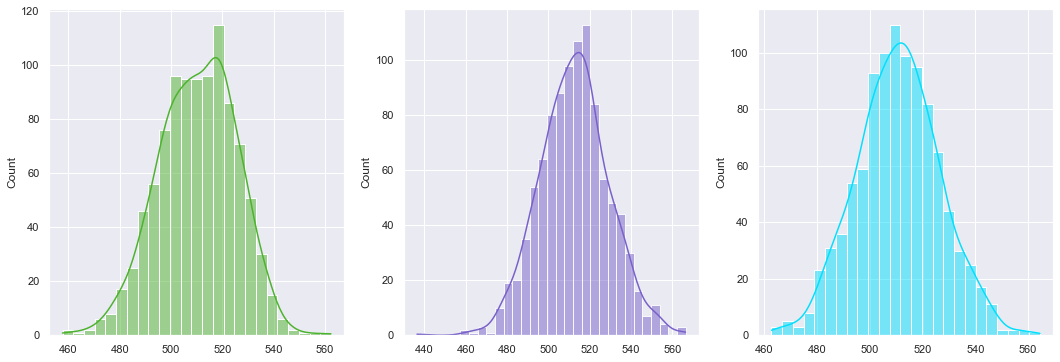

In [70]:
#fig_knn1, axs_knn1 = plt.subplots(1, 1, figsize=(7, 7))
#x = plt.subplots(1, 1, figsize=(7, 7))


#ax = sns.histplot(metrics2_1, kde=True, color="skyblue")

#sns.histplot(data=df, x="sepal_width", kde=True, color="olive", ax=axs[0, 1])
#sns.histplot(data=df, x="petal_length", kde=True, color="gold", ax=axs[1, 0])
#sns.histplot(data=df, x="petal_width", kde=True, color="teal", ax=axs[1, 1])

#fig_knn1, axs_knn1 = plt.subplots(1, 3, figsize=(7, 7))

fig_knn2, axs_2 = plt.subplots(1, 3, figsize = (18, 6))

sns.histplot(metrics2_1, kde=True, color="#4db32e", ax=axs_2[0])
sns.histplot(metrics2_2, kde=True, color="#7961c9", ax=axs_2[1])
sns.histplot(metrics2_3, kde=True, color="#03dffc", ax=axs_2[2])

plt.savefig('sns_example2.png')
plt.show()

In [71]:
confidence_interval2_3

[481.05034387621106, 542.0612035881468]

In [72]:
model_knn_2 = KNeighborsRegressor(n_neighbors = 40)
model_knn_2.fit(X2_train_log.reshape(-1, 1), y2_train_log.reshape(-1, 1))
y_knn_train_pred_2_log = model_knn_2.predict(X2_train_log.reshape(-1, 1))
y_knn_test_pred_2_log = model_knn_2.predict(X2_test_log.reshape(-1, 1))

In [73]:
y_knn_train_pred_2 = pow(10, y_knn_train_pred_2_log)
#y_knn_train_pred_2 = y_knn_train_pred_2_log
y_knn_test_pred_2 = pow(10, y_knn_test_pred_2_log)
#y_knn_test_pred_2 = y_knn_test_pred_2_log
#X2_inverse = pow(10, y_knn_test_pred_2_log) #<- Will cause runtime error that is overflow in power function.

In [74]:
# First the training metrics.
knn2_train_mae = mean_absolute_error(y2_train, y_knn_train_pred_2)
knn2_train_mse = mean_squared_error(y2_train, y_knn_train_pred_2)
knn2_train_rmse = sqrt(knn2_train_mse) # <- will compute the root mean square error
knn2_train_r2 = r2_score(y2_train, y_knn_train_pred_2)
# Now, test set metrics.
knn2_test_mae = mean_absolute_error(y2_test, y_knn_test_pred_2)
knn2_test_mse = mean_squared_error(y2_test, y_knn_test_pred_2)
knn2_test_rmse = sqrt(knn2_test_mse)
knn2_test_r2 = r2_score(y2_test, y_knn_test_pred_2)
# Consolidate the results.
knn_results_2 = pd.DataFrame(['k Nearest Neighbor', knn2_train_mae, knn2_train_mse, knn2_train_rmse, knn2_train_r2, knn2_test_mae, knn2_test_mse, knn2_test_rmse, knn2_test_r2]).transpose()
knn_results_2.columns = metric_col_names
knn_results_2

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,k Nearest Neighbor,386.712371,271264.060603,520.830165,0.265183,371.570213,220367.820956,469.433511,0.214748


Now to build Support Vector Regressor model.

In [75]:
# Setting the hyperparameter
eps_2 = 8
hyperparam1 = 1000
svr_2 = SVR(kernel = 'rbf', C = hyperparam1, epsilon = eps_2)
svr_2.fit(X2_train_log, y2_train_log)

#y_svr_train_pred_2 = svr_regressor_2.predict(X2_train)
y_svr_train_pred_2_log = svr_2.predict(X2_train_log)
#y_svr_test_pred_2 = svr_regressor_2.predict(X2_test)
y_svr_test_pred_2_log = svr_2.predict(X2_test_log)
y_svr_train_pred_2 = pow(10, y_svr_train_pred_2_log)
y_svr_test_pred_2 = pow(10, y_svr_test_pred_2_log)

In [76]:
# Model performance - training set
svr2_train_mae = mean_absolute_error(y2_train, y_svr_train_pred_2_log)
svr2_train_mse = mean_squared_error(y2_train, y_svr_train_pred_2_log)
svr2_train_rmse = sqrt(svr2_train_mse)
svr2_train_r2 = r2_score(y2_train, y_svr_train_pred_2_log)
# Model performance - test set
svr2_test_mae = mean_absolute_error(y2_test, y_svr_test_pred_2_log)
svr2_test_mse = mean_squared_error(y2_test, y_svr_test_pred_2_log)
svr2_test_rmse = sqrt(svr2_test_mse)
svr2_test_r2 = r2_score(X2_test, y_svr_test_pred_2_log)
# Consolidate the results.
# Notice use of the transpose here.
svr_results_2 = pd.DataFrame(['SVR', svr2_train_mae, svr2_train_mse, svr2_train_rmse, svr2_train_r2, svr2_test_mae, svr2_test_mse, svr2_test_rmse, svr2_test_r2]).T
svr_results_2.columns = metric_col_names
svr_results_2

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,SVR,1199.017726,1806802.352901,1344.173483,-3.894376,1151.7623,1607189.629926,1267.749829,-0.31663


In [77]:
rf_2 = RandomForestRegressor(max_depth = 2)
rf_2.fit(X2_train_log, y2_train_log)
y_rf_train_pred_2_log = rf_2.predict(X2_train_log)
y_rf_test_pred_2_log = rf_2.predict(X2_test_log)
rf_2

RandomForestRegressor(max_depth=2)

In [78]:
y_rf_train_pred_2 = pow(10, y_rf_train_pred_2_log)
y_rf_test_pred_2 = pow(10, y_rf_test_pred_2_log)
# Model performance metrics for random forest model.
rf2_train_mae = mean_absolute_error(y2_train, y_rf_train_pred_2)
rf2_train_mse = mean_squared_error(y2_train, y_rf_train_pred_2)
rf2_train_rmse = sqrt(rf2_train_mse)
rf2_train_r2 = r2_score(y2_train, y_rf_train_pred_2)
# The following are the test metrics.
rf2_test_mae = mean_absolute_error(y2_test, y_rf_test_pred_2)
rf2_test_mse = mean_squared_error(y2_test, y_rf_test_pred_2)
rf2_test_rmse = sqrt(rf2_test_mse)
rf2_test_r2 = r2_score(y2_test, y_rf_test_pred_2)

In [79]:
rf2_results = pd.DataFrame(['Random Forest', rf2_train_mae, rf2_train_mse, rf2_train_rmse, rf2_train_r2, rf2_test_mae, rf2_test_mse, rf2_test_rmse, rf2_test_r2]).transpose()
rf2_results.columns = metric_col_names
rf2_results

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Random Forest,391.907521,277917.155389,527.178485,0.247161,370.509214,217341.218573,466.19869,0.225533


In [80]:
results_2 = pd.concat([baseline_2, knn_results_2, svr_results_2, rf2_results], axis = 0, ignore_index = True)
results_2 

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Baseline,499.285981,369158.844853,607.584434,0.0,452.721233,282866.309612,531.851774,-0.007957
1,k Nearest Neighbor,386.712371,271264.060603,520.830165,0.265183,371.570213,220367.820956,469.433511,0.214748
2,SVR,1199.017726,1806802.352901,1344.173483,-3.894376,1151.7623,1607189.629926,1267.749829,-0.31663
3,Random Forest,391.907521,277917.155389,527.178485,0.247161,370.509214,217341.218573,466.19869,0.225533


#### Hypothesis Testing- Case 2

#### Correlation Tests - Case 2

In [81]:
# Spearman's Rank Correlation Test
stat_3, p_3 = spearmanr(mass_log, temp_log)
print('stat = %.3f, p = %.3f' % (stat_3, p_3))
if p_3 > 0.05:
    print('Probably Independent')
else :
    print('Probably Dependent')

stat = 0.496, p = 0.000
Probably Dependent


In [82]:
execution_time_1 = (time.time() - start_time_1)
print('Execution time in seconds: ' + str(execution_time_1))

Execution time in seconds: 1889.4522910118103


#### Nonparametric Statistical Hypothesis Tests - Case 2

In [83]:
# Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
stat_4, p_4 = wilcoxon(mass_log, temp_log)
print('stat = %.3f, p = %.3f' % (stat_4, p_4))
if p_4 > 0.05:
    print('Probably Independent')
else :
    print('Probably Dependent')
    

stat = 0.000, p = 0.000
Probably Dependent


The following will be the predicted versus actual plot for Case 2.
Now, want the true versus the predicted values.

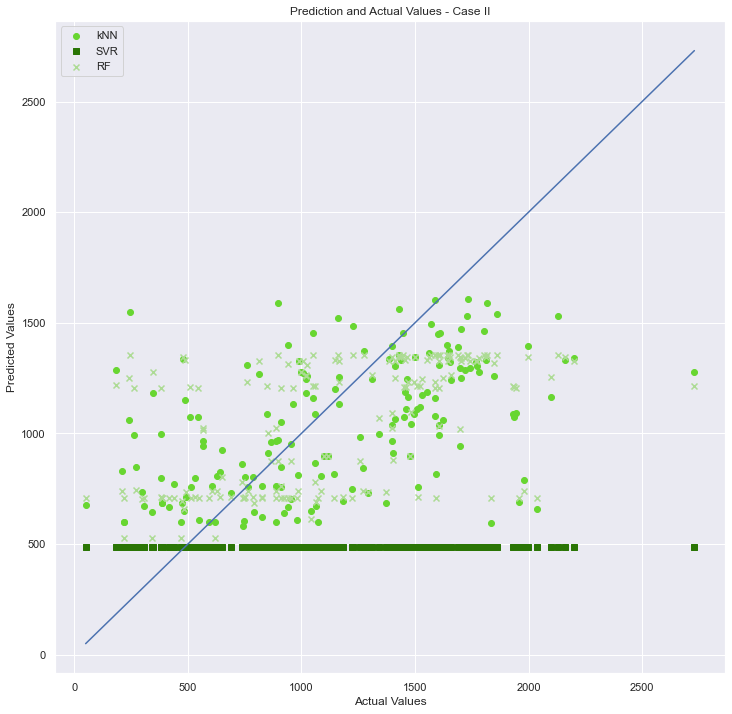

In [84]:
true_values_2 = y2_test
predicted_values2_1 = y_knn_test_pred_2
predicted_values2_2 = y_svr_test_pred_2
predicted_values2_3 = y_rf_test_pred_2
plt.figure(figsize = (12, 12))
# kNN model
knn_2 = plt.scatter(x = true_values_2, y = predicted_values2_1, c = '#68d631')
# SVR model
svr_2 = plt.scatter(x = true_values_2, y = predicted_values2_2, c = '#2a7505', marker = 's')
# Random Forest model
rf_2 = plt.scatter(x = true_values_2, y = predicted_values2_3, c = '#addb95', marker = 'x')
p3 = max(max(predicted_values2_1), max(predicted_values2_2), max(predicted_values2_3), max(true_values_2))
p4 = min(min(predicted_values2_1), min(predicted_values2_2), min(predicted_values2_3), min(true_values_2))

plt.plot([p3, p4], [p3, p4], 'b-')
plt.title('Prediction and Actual Values - Case II')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend([knn_2, svr_2, rf_2], ['kNN', 'SVR', 'RF'], loc = 'upper left')
plt.savefig('pred_vs_actual_2.png',dpi=600)
plt.show()

The following will be the residuals plot for Case 2.

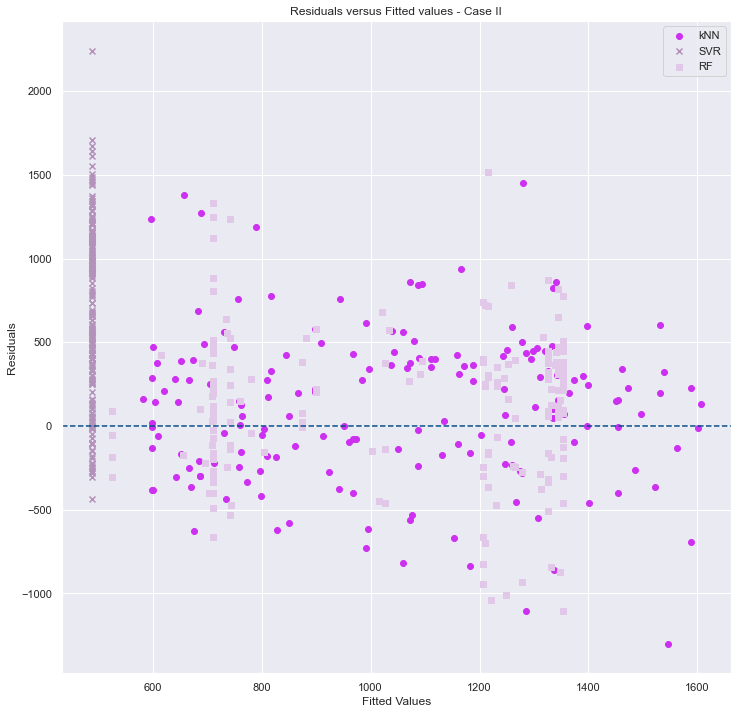

In [85]:
# Will invoke for loop to calculate residulas for the three different models.
residuals2_1 = list()
for item7, item8 in zip(true_values_2, predicted_values2_1):
    residuals2_1.append(item7 - item8)
residuals2_2 = list()
for item9, item10 in zip(true_values_2, predicted_values2_2):
    residuals2_2.append(item9 - item10)
residuals2_3 = list()
for item11, item12 in zip(true_values_2, predicted_values2_3):
    residuals2_3.append(item11 - item12)

plt.figure(figsize = (12, 12))
# kNN model
knn_resid_2 = plt.scatter(x = predicted_values2_1, y = residuals2_1, c = '#cd30f0')
# SVR model
svr_resid_2 = plt.scatter(x = predicted_values2_2, y = residuals2_2, c = '#b391ba', marker = 'x')
# Random Forest model
rf_resid_2 = plt.scatter(x = predicted_values2_3, y = residuals2_3, c = '#e2c8e8', marker = 's')

plt.title('Residuals versus Fitted values - Case II')
plt.xlabel('Fitted Values') # <- Predicted Values
plt.ylabel('Residuals')
plt.legend([knn_resid_2, svr_resid_2, rf_resid_2], ['kNN', 'SVR', 'RF'], loc = 'upper right')
plt.axhline(y = 0.0, color = '#034b8a', linestyle = '--')
plt.savefig('resid_2.png',dpi=600)
plt.show()

(array([ 7.,  4., 16., 33., 32., 53., 15.,  7.,  3.,  2.]),
 array([-1106.06935828,  -844.07951554,  -582.08967279,  -320.09983004,
          -58.10998729,   203.87985545,   465.8696982 ,   727.85954095,
          989.8493837 ,  1251.83922644,  1513.82906919]),
 <BarContainer object of 10 artists>)

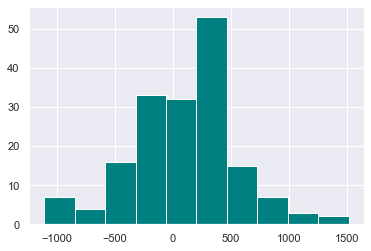

In [86]:
plt.hist(residuals2_3, color = "teal", edgecolor = 'white')

(array([11., 21., 20., 33., 16., 40., 19., 10.,  1.,  1.]),
 array([-438.8251221, -170.8251221,   97.1748779,  365.1748779,
         633.1748779,  901.1748779, 1169.1748779, 1437.1748779,
        1705.1748779, 1973.1748779, 2241.1748779]),
 <BarContainer object of 10 artists>)

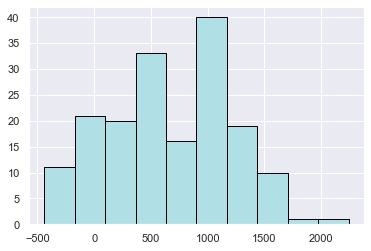

In [87]:
plt.hist(residuals2_2, color = 'powderblue', edgecolor = 'black')

### Scenario 3 - orbital period as function of planetary mass


In [88]:
df4 = raw_data.loc[:, ['pl_name','pl_bmassj','pl_orbper']]
df4

,pl_name,pl_bmassj,pl_orbper
0,11 Com b,19.40,326.03000
1,11 Com b,17.10,NaN
2,11 UMi b,10.80,NaN
3,11 UMi b,14.74,516.21997
4,11 UMi b,10.50,516.22000
...,...,...,...
32511,ups And d,4.10,1282.41000
32512,ups And d,10.25,1281.50700
32513,ups Leo b,0.51,385.20000
32514,xi Aql b,2.02,NaN


In [89]:
df4 = df4.rename(columns={'pl_name':'planetname', 'pl_bmassj':'mass', 'pl_orbper':'orbit period'})
df4 = df4.dropna()
#df4 = df4.fillna(df4.median(numeric_only=True))
df4

,planetname,mass,orbit period
0,11 Com b,19.40,326.03000
3,11 UMi b,14.74,516.21997
4,11 UMi b,10.50,516.22000
6,14 And b,4.80,185.84000
7,14 Her b,4.85,1766.41000
...,...,...,...
32510,ups And d,3.95,1274.60000
32511,ups And d,4.10,1282.41000
32512,ups And d,10.25,1281.50700
32513,ups Leo b,0.51,385.20000


In [90]:
mass_2 = df4.groupby('planetname')['mass'].mean()
orbper_2 = df4.groupby('planetname')['orbit period'].mean()

Length of variables for reporting.

In [91]:
print("The length of predictor (mass) is: ", len(mass_2.index))

The length of predictor (mass) is:  2044


In [92]:
print("The length of predictor (orbital period) is: ", len(orbper_2.index))

The length of predictor (orbital period) is:  2044


Now some summary statistics for this scenario.

In [93]:
mass2_med = statistics.median(list(mass_2))
orbper2_med = statistics.median(list(orbper_2))
print('\nThe median of the orbital period: %.4f' % orbper_med)
print('\nThe median of the mass: %.2f' % mass2_med)
iqr_mass2 = stats.iqr(mass_2, interpolation = 'midpoint')
iqr_orbper2 = stats.iqr(orbper_2, interpolation = 'midpoint')
print('\nThe interquartile range of the mass: %.2f' % iqr_mass2)
print('\nThe interquartile range of the orbital period: %.2f' % iqr_orbper2)
mass2_mode = statistics.mode(list(mass_2))
print('\nThe mode for the mass: %.2f' % mass2_mode)
orbper2_mode = statistics.mode(list(orbper_2))
print('\nThe mode for the orbital period: %.2f' % orbper2_mode)
mass2_avg = statistics.mean(list(mass_2))
print('\nThe mean for the mass: %.2f' % eccen_avg)
orbper2_avg = statistics.mean(list(orbper_2))
print('\nThe mean for the orbital period: %.2f' % orbper2_avg)


The median of the orbital period: 12.2538

The median of the mass: 0.58

The interquartile range of the mass: 1.92

The interquartile range of the orbital period: 319.63

The mode for the mass: 0.84

The mode for the orbital period: 691.90

The mean for the mass: 0.06

The mean for the orbital period: 205801.12


In [94]:
# Min, 1st quantile, median, 3rd quantile, max
fivenum(mass_2)

array([5.50000e-05, 4.61025e-02, 5.84500e-01, 1.96325e+00, 8.00000e+01])

In [95]:
# Min, 1st quantile, median, 3rd quantile, max
fivenum(orbper_2)

array([9.0706290e-02, 4.1707563e+00, 1.5117000e+01, 3.2380000e+02,
       4.0200000e+08])

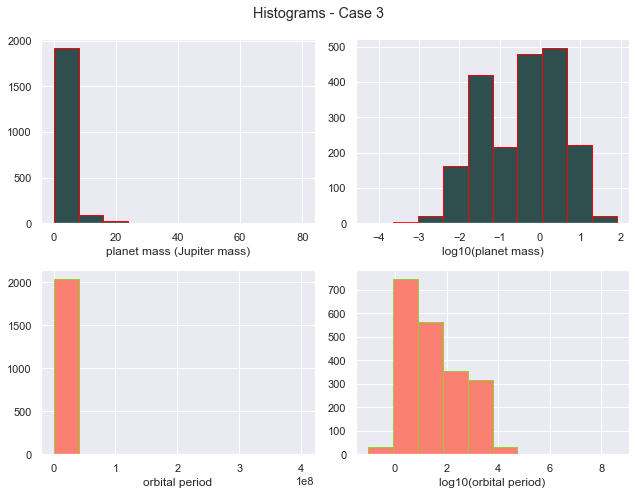

In [96]:
# Case 3
# First, perform log base 10 transform
mass2_log = np.log10(mass_2)
orbper2_log = np.log10(orbper_2)
# Plotting Logic
fig3, ax3 = plt.subplots(2, 2,figsize = (9, 7))
fig3.suptitle('Histograms - Case 3')
ax3[0, 0].hist(mass_2, color = 'darkslategray', edgecolor = 'red')
#ax3[0, 0].set_title('') #<- use this logic to give each plot its own title.
ax3[0, 0].set(xlabel = 'planet mass (Jupiter mass)')
ax3[0, 1].hist(mass2_log, color = 'darkslategray', edgecolor = 'red')
ax3[0, 1].set(xlabel = 'log10(planet mass)')
ax3[1, 0].hist(orbper_2, color = 'salmon', edgecolor = 'yellowgreen')
ax3[1, 0].set(xlabel = 'orbital period')
ax3[1, 1].hist(orbper2_log, color = 'salmon', edgecolor = 'yellowgreen')
ax3[1, 1].set(xlabel = 'log10(orbital period)')

for ax in ax1.flat:
    ax.set(ylabel = 'Frequency')
plt.savefig('histograms_3.png',dpi=600)
fig3.tight_layout()

In [97]:
y3 = np.array(mass_2).reshape(-1, 1)
X3 = np.array(orbper_2).reshape(-1, 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size = 0.80, random_state = 25)
y3_train = y3_train.reshape(len(y3_train), )
y3_test = y3_test.reshape(len(y3_test), )

Establishing baselines for predictions according to the y-variable or response variable.

In [98]:
y_baseline_3= y3_train.mean()
#y_baseline_2= statistics.median(y2_train)
y_pred_train_3 = [y_baseline_3]*len(y3_train) # <- Training Baseline
y_pred_test_3 = [y_baseline_3]*len(y3_test)

In [99]:
# Following is for the Training Dataset.
# Error for training data baseline guess.
mae_train_3 = mean_absolute_error(y3_train, y_pred_train_3)
# Mean squared error for training data baseline guess.
mse_train_3 = mean_squared_error(y3_train, y_pred_train_3)
rmse_train_3 = sqrt(mse_train_3) # <- will compute the root mean square error
# R-squared for training data baseline guess.
y3_train_r2 = r2_score(y3_train, y_pred_train_3)

In [100]:
# Error for test data baseline guess.
mae_test_3 = mean_absolute_error(y3_test, y_pred_test_3)
# Mean squared error for test data baseline guess.
mse_test_3 = mean_squared_error(y3_test, y_pred_test_3)
# Test Root Mean Square Error
rmse_test_3 = sqrt(mse_test_3)
# R-squared for test data baseline guess.
y3_test_r2 = r2_score(y3_test, y_pred_test_3)

In [101]:
baseline_3 = pd.DataFrame(['Baseline', mae_train_3, mse_train_3, rmse_train_3, y3_train_r2, mae_test_3, mse_test_3, rmse_test_3, y3_test_r2]).T
baseline_3.columns = metric_col_names
baseline_3

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Baseline,2.26785,17.259215,4.154421,0.0,2.25424,12.166825,3.488098,-0.005808


In [102]:
X3_train_log, X3_test_log = np.log10(X3_train), np.log10(X3_test)
y3_train_log = np.log10(y3_train)

Some logic to determine the shape of the training and test sets of the data.

In [103]:
print('\nTraining log(X3) shape: ', X3_train_log.shape)
print('Training Log(y3) shape: ', y3_train_log.shape)
print('Test Log(X3) shape: ', X3_test_log.shape)
print('Test y3 shape: ', y3_test.shape)


Training log(X3) shape:  (1635, 1)
Training Log(y3) shape:  (1635,)
Test Log(X3) shape:  (409, 1)
Test y3 shape:  (409,)


In [104]:
# kNN R-squared accuracy
knn_r_acc_3 = []
for k in range(1, 75, 1):
    knn_3 = KNeighborsRegressor(n_neighbors = k)
    knn_3.fit(X3_train_log.reshape(-1, 1), y3_train_log.reshape(-1, 1))
    test_score_3 = knn_3.score(X3_test_log.reshape(-1, 1), np.log10(y3_test))
    train_score_3 = knn_3.score(X3_train_log.reshape(-1, 1), y3_train_log.reshape(-1, 1))
    knn_r_acc_3.append((k, test_score_3, train_score_3))
outcomes_3 = pd.DataFrame(knn_r_acc_3, columns = ['k', 'Test Score', 'Train Score'])
print(outcomes_3)
print('The highest Test R-squared value occurs at : %.4f' % outcomes_3.iloc[:,1].max())
print('Within given range, optimal k is: ', outcomes_3.loc[outcomes_3['Test Score'] == outcomes_3.iloc[:,1].max(), 'k'].iloc[0])

     k  Test Score  Train Score
0    1   -0.200677     0.999522
1    2    0.063345     0.678895
2    3    0.123395     0.575838
3    4    0.177577     0.537327
4    5    0.207457     0.501711
..  ..         ...          ...
69  70    0.304612     0.377802
70  71    0.304966     0.377162
71  72    0.306017     0.377437
72  73    0.305889     0.377628
73  74    0.306079     0.377228

[74 rows x 3 columns]
The highest Test R-squared value occurs at : 0.3092
Within given range, optimal k is:  32


#### Bootstrap Confidence Interval for RMSE values

Execution time in minutes: 12.079541516304015


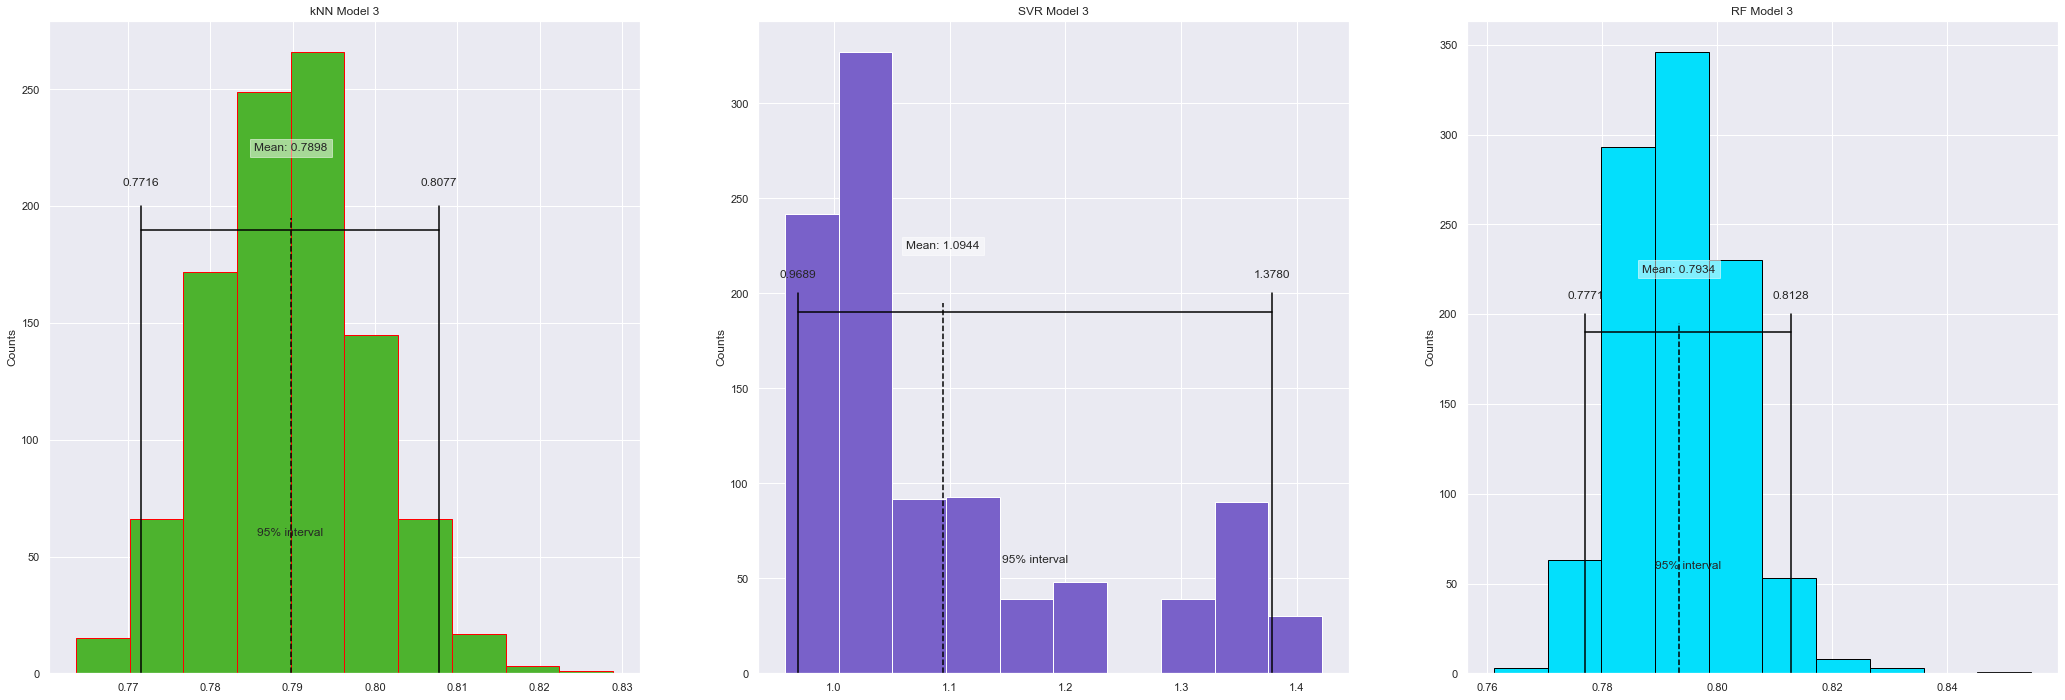

In [105]:
start_time_3 = time.time()

df4 = pd.concat([orbper2_log, mass2_log], axis=1)
metrics3_1 = ci_bootstrap(df4, KNeighborsRegressor(n_neighbors = 32))

# Plotting Logic
fig3_2, ax3_2 = plt.subplots(1, 3, figsize = (36, 12))
#fig1_2.suptitle('Bootstrap Performance Metrics - Case 1')

# Confidence Interval
confidence_interval3_1 = list(metrics3_1.quantile([0.025, 0.975]))

ax3_2[0].hist(metrics3_1, color='#4db32e', edgecolor = "red")
ax3_2[0].plot(confidence_interval3_1, [190, 190], color='black')
for x3 in confidence_interval3_1:
    ax3_2[0].plot([x3, x3], [0, 200], color='black')
    ax3_2[0].text(x3, 210, f'{x3:.4f}', 
            horizontalalignment='center', verticalalignment='center')
ax3_2[0].text(sum(confidence_interval3_1) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

mean_knn_model_3 = metrics3_1.mean()
ax3_2[0].plot([mean_knn_model_3, mean_knn_model_3], [0, 195], color='black', linestyle='--')
ax3_2[0].text(mean_knn_model_3, 225, f'Mean: {mean_knn_model_3:.4f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax3_2[0].set_title('kNN Model 3')

# Now for the SVR model
eps_3 = 8 #<- hyperparameters used throughout the script
hyperparam3 = 1000 #<- hyperparameters used throughout the script
metrics3_2 = ci_bootstrap(df4, SVR(kernel = 'rbf', C = hyperparam3, epsilon = eps_3))
confidence_interval3_2 = list(metrics3_2.quantile([0.025, 0.975]))

ax3_2[1].hist(metrics3_2, color='#7961c9', edgecolor = "white")
ax3_2[1].plot(confidence_interval3_2, [190, 190], color='black')
for x3 in confidence_interval3_2:
    ax3_2[1].plot([x3, x3], [0, 200], color='black')
    ax3_2[1].text(x3, 210, f'{x3:.4f}', 
            horizontalalignment='center', verticalalignment='center')
ax3_2[1].text(sum(confidence_interval3_2) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

mean_svr_model_3 = metrics3_2.mean()
ax3_2[1].plot([mean_svr_model_3, mean_svr_model_3], [0, 195], color='black', linestyle='--')
ax3_2[1].text(mean_svr_model_3, 225, f'Mean: {mean_svr_model_3:.4f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax3_2[1].set_title('SVR Model 3')

# Now for the Random Forest model
metrics3_3 = ci_bootstrap(df4, RandomForestRegressor(max_depth=2))
confidence_interval3_3 = list(metrics3_3.quantile([0.025, 0.975]))

ax3_2[2].hist(metrics3_3, color='#03dffc', edgecolor = "black")
ax3_2[2].plot(confidence_interval3_3, [190, 190], color='black')
for x3 in confidence_interval3_3:
    ax3_2[2].plot([x3, x3], [0, 200], color='black')
    ax3_2[2].text(x3, 210, f'{x3:.4f}', 
            horizontalalignment='center', verticalalignment='center')
ax3_2[2].text(sum(confidence_interval3_3) / 2, 60, '95% interval',
        horizontalalignment='center', verticalalignment='center')

mean_rf_model_3 = metrics3_3.mean()
ax3_2[2].plot([mean_rf_model_3, mean_rf_model_3], [0, 195], color='black', linestyle='--')
ax3_2[2].text(mean_rf_model_3, 225, f'Mean: {mean_rf_model_3:.4f}',
      bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
       horizontalalignment='center', verticalalignment='center')
ax3_2[2].set_title('RF Model 3')

for ax in ax3_2.flat:
    ax.set(ylabel = 'Counts')
    #ax.set(xlabel = 'RMSE eccentricity (unitless)')

plt.savefig('bootstrap_rmse_3.png',dpi=800)
execution_time_3 = (time.time() - start_time_3)
print('Execution time in minutes: ' + str(execution_time_3/60))

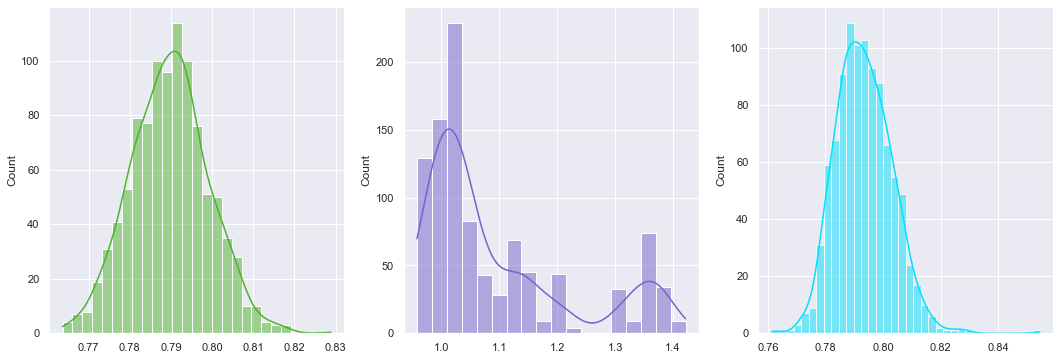

In [106]:
fig_knn3, axs_3 = plt.subplots(1, 3, figsize = (18, 6))

sns.histplot(metrics3_1, kde=True, color="#4db32e", ax=axs_3[0])
sns.histplot(metrics3_2, kde=True, color="#7961c9", ax=axs_3[1])
sns.histplot(metrics3_3, kde=True, color="#03dffc", ax=axs_3[2])

plt.savefig('sns_example3.png')
plt.show()

In [107]:
model_knn_3 = KNeighborsRegressor(n_neighbors = 32)
model_knn_3.fit(X3_train_log.reshape(-1, 1), y3_train_log.reshape(-1, 1))
y_knn_train_pred_3_log = model_knn_3.predict(X3_train_log.reshape(-1, 1))
y_knn_test_pred_3_log = model_knn_3.predict(X3_test_log.reshape(-1, 1))

In [108]:
y_knn_train_pred_3 = pow(10, y_knn_train_pred_3_log)
y_knn_test_pred_3 = pow(10, y_knn_test_pred_3_log)

In [109]:
# First the training metrics.
knn3_train_mae = mean_absolute_error(y3_train, y_knn_train_pred_3)
knn3_train_mse = mean_squared_error(y3_train, y_knn_train_pred_3)
knn3_train_rmse = sqrt(knn3_train_mse) # <- will compute the root mean square error
knn3_train_r2 = r2_score(y3_train, y_knn_train_pred_3)
# Now, test set metrics.
knn3_test_mae = mean_absolute_error(y3_test, y_knn_test_pred_3)
knn3_test_mse = mean_squared_error(y3_test, y_knn_test_pred_3)
knn3_test_rmse = sqrt(knn3_test_mse)
knn3_test_r2 = r2_score(y3_test, y_knn_test_pred_3)
# Consolidate the results.
knn_results_3 = pd.DataFrame(['k Nearest Neighbor', knn3_train_mae, knn3_train_mse, knn3_train_rmse, knn3_train_r2, knn3_test_mae, knn3_test_mse, knn3_test_rmse, knn3_test_r2]).transpose()
knn_results_3.columns = metric_col_names
knn_results_3

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,k Nearest Neighbor,1.562636,16.173305,4.021605,0.062918,1.395098,10.427076,3.229098,0.138014


Now to create the SVR model 3.

In [110]:
eps_3 = 6
svr_3 = SVR(kernel = 'rbf', C = 100, epsilon = eps_3)
svr_3.fit(X3_train_log, y3_train_log)

y_svr_train_pred_3_log = svr_3.predict(X3_train_log)
y_svr_test_pred_3_log = svr_3.predict(X3_test_log)
y_svr_train_pred_3 = pow(10, y_svr_train_pred_3_log)
y_svr_test_pred_3 = pow(10, y_svr_test_pred_3_log)

In [111]:
# Model performance - training set
svr3_train_mae = mean_absolute_error(y3_train, y_svr_train_pred_3)
svr3_train_mse = mean_squared_error(y3_train, y_svr_train_pred_3)
svr3_train_rmse = sqrt(svr3_train_mse)
svr3_train_r2 = r2_score(y3_train, y_svr_train_pred_3)
# Model performance - test results
svr3_test_mae = mean_absolute_error(y3_test, y_svr_test_pred_3)
svr3_test_mse = mean_squared_error(y3_test, y_svr_test_pred_3)
svr3_test_rmse = sqrt(svr3_test_mse)
svr3_test_r2 = r2_score(X3_test, y_svr_test_pred_3)
# Consolidate the results.
svr_results_3 = pd.DataFrame(['SVR', svr3_train_mae, svr3_train_mse, svr3_train_rmse, svr3_train_r2, svr3_test_mae, svr3_test_mse, svr3_test_rmse, svr3_test_r2]).T
svr_results_3.columns = metric_col_names
svr_results_3

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,SVR,1.969233,21.048826,4.5879,-0.21957,1.709498,14.924438,3.863216,-0.045966


In [112]:
rf_3 = RandomForestRegressor(max_depth = 2)
rf_3.fit(X3_train_log, y3_train_log)
y_rf_train_pred_3_log = rf_3.predict(X3_train_log)
y_rf_test_pred_3_log = rf_3.predict(X3_test_log)
rf_3

RandomForestRegressor(max_depth=2)

In [113]:
y_rf_train_pred_3 = pow(10, y_rf_train_pred_3_log)
y_rf_test_pred_3 = pow(10, y_rf_test_pred_3_log)
# Model performance metrics for random forest model.
rf3_train_mae = mean_absolute_error(y3_train, y_rf_train_pred_3)
rf3_train_mse = mean_squared_error(y3_train, y_rf_train_pred_3)
rf3_train_rmse = sqrt(rf3_train_mse)
rf3_train_r2 = r2_score(y3_train, y_rf_train_pred_3)
# The following are the test metrics.
rf3_test_mae = mean_absolute_error(y3_test, y_rf_test_pred_3)
rf3_test_mse = mean_squared_error(y3_test, y_rf_test_pred_3)
rf3_test_rmse = sqrt(rf3_test_mse)
rf3_test_r2 = r2_score(y3_test, y_rf_test_pred_3)

In [114]:
rf3_results = pd.DataFrame(['Random Forest', rf3_train_mae, rf3_train_mse, rf3_train_rmse, rf3_train_r2, rf3_test_mae, rf3_test_mse, rf3_test_rmse, rf3_test_r2]).transpose()
rf3_results.columns = metric_col_names
rf3_results

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Random Forest,1.585397,16.317883,4.03954,0.054541,1.416475,10.666449,3.265953,0.118225


In [115]:
results_3 = pd.concat([baseline_3, knn_results_3, svr_results_3, rf3_results], axis = 0, ignore_index = True)
results_3 

,Method,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Baseline,2.26785,17.259215,4.154421,0.0,2.25424,12.166825,3.488098,-0.005808
1,k Nearest Neighbor,1.562636,16.173305,4.021605,0.062918,1.395098,10.427076,3.229098,0.138014
2,SVR,1.969233,21.048826,4.5879,-0.21957,1.709498,14.924438,3.863216,-0.045966
3,Random Forest,1.585397,16.317883,4.03954,0.054541,1.416475,10.666449,3.265953,0.118225


### Bootstrap Confidence Intervals

#### Hypothesis Testing- Case 3

#### Correlation Tests - Case 3

In [116]:
# Spearman's Rank Correlation Test
stat_7, p_7 = spearmanr(np.log10(X3), np.log10(y3))
print('stat = %.3f, p = %.3f' % (stat_7, p_7))
if p_7 > 0.05:
    print('Probably Independent')
else :
    print('Probably Dependent')

stat = 0.326, p = 0.000
Probably Dependent


#### Nonparametric Statistical Hypothesis Tests - Case 3

In [117]:
stat_8, p_8 = wilcoxon(np.log10(mass_2), np.log10(orbper_2))
print('stat = %.3f, p = %.3f' % (stat_8, p_8))
if p_8 > 0.05:
    print('Probably Independent')
else :
    print('Probably Dependent')

stat = 14762.000, p = 0.000
Probably Dependent


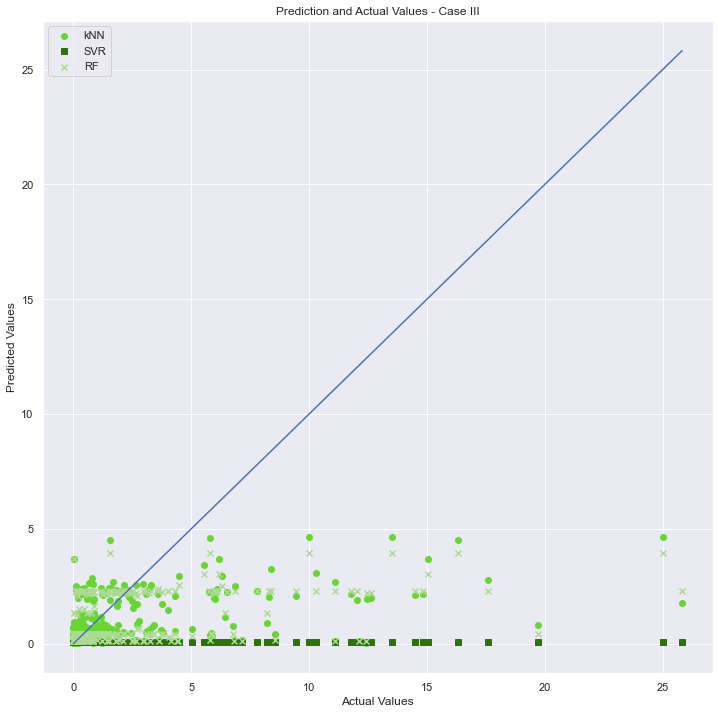

In [118]:
true_values_3 = y3_test
predicted_values3_1 = y_knn_test_pred_3
predicted_values3_2 = y_svr_test_pred_3
predicted_values3_3 = y_rf_test_pred_3
plt.figure(figsize = (12, 12))
# kNN model
knn_3 = plt.scatter(x = true_values_3, y = predicted_values3_1, c = '#68d631')
# SVR model
svr_3 = plt.scatter(x = true_values_3, y = predicted_values3_2, c = '#2a7505', marker = 's')
# Random Forest model
rf_3 = plt.scatter(x = true_values_3, y = predicted_values3_3, c = '#addb95', marker = 'x')
p5 = max(max(predicted_values3_1), max(predicted_values3_2), max(predicted_values3_3), max(true_values_3))
p6 = min(min(predicted_values3_1), min(predicted_values3_2), min(predicted_values3_3), min(true_values_3))

plt.plot([p5, p6], [p5, p6], 'b-')
plt.title('Prediction and Actual Values - Case III')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend([knn_3, svr_3, rf_3], ['kNN', 'SVR', 'RF'], loc = 'upper left')
plt.savefig('pred_vs_actual_3.png',dpi=600)
plt.show()

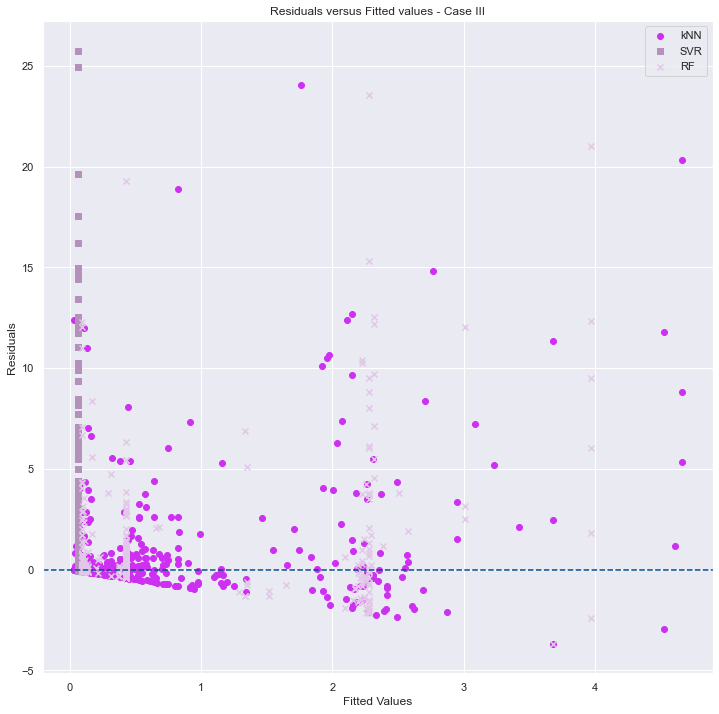

In [119]:
# Will invoke for loop to calculate residulas for the three different models.
residuals3_1 = list()
for item13, item14 in zip(true_values_3, predicted_values3_1):
    residuals3_1.append(item13 - item14)
residuals3_2 = list()
for item15, item16 in zip(true_values_3, predicted_values3_2):
    residuals3_2.append(item15 - item16)
residuals3_3 = list()
for item17, item18 in zip(true_values_3, predicted_values3_3):
    residuals3_3.append(item17 - item18)

plt.figure(figsize = (12, 12))
# kNN model
knn_resid_3 = plt.scatter(x = predicted_values3_1, y = residuals3_1, c = '#cd30f0')
# SVR model
svr_resid_3 = plt.scatter(x = predicted_values3_2, y = residuals3_2, c = '#b391ba', marker = 's')
# Random Forest model
rf_resid_3 = plt.scatter(x = predicted_values3_3, y = residuals3_3, c = '#e2c8e8', marker = 'x')

plt.title('Residuals versus Fitted values - Case III')
plt.xlabel('Fitted Values') # <- Predicted Values
plt.ylabel('Residuals')
plt.legend([knn_resid_3, svr_resid_3, rf_resid_3], ['kNN', 'SVR', 'RF'], loc = 'upper right')
plt.axhline(y = 0.0, color = '#034b8a', linestyle = '--')
plt.savefig('resid_3.png',dpi=600)
plt.show()

In [120]:
execution_time_0 = (time.time() - start_time_0)
print('Execution time in minutes: ' + str(execution_time_0/60))

Execution time in minutes: 44.32429029544195


In [121]:
# End of exoplanet data notebook.